# Bank Loan Case Study

In [1]:
#Importing Python Libraries/Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline


In [3]:
Application_Data = pd.read_csv("application_data.csv")
Previous_Application = pd.read_csv("previous_application.csv")

In [4]:
Application_Data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [8]:
Previous_Application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [8]:
#Column types
Application_Data.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
Previous_Application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
#Checking the Numeric Variables 
Application_Data.describe()


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [11]:
Previous_Application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

# 2.A. Data Cleaning and Manipulation of Application_Data #

In [4]:
round(Application_Data.isnull().sum() / Application_Data.shape[0] * 100.00,2)


SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [5]:
# listing the null values columns having more than 40%

emptycol=Application_Data.isnull().sum()
emptycol=emptycol[emptycol.values>(0.4*len(emptycol))]
emptycol

AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
EXT_SOURCE_1                  173378
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 64, dtype: int64

In [6]:
values_0=Application_Data['AMT_GOODS_PRICE'].median()

Application_Data.loc[Application_Data['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values_0

In [7]:
# listing columns with null values more than 40%
emptycol

AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
EXT_SOURCE_1                  173378
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 64, dtype: int64

In [8]:
# Removing those 64 columns
emptycol = list(emptycol[emptycol.values>=0.4].index)
Application_Data.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


64 columns get dropped from the Application Data

In [7]:
#Checking other columns with less % of null values
Application_Data.isnull().sum()/len(Application_Data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [9]:
# Filling missing values in AMT_ ANNUITY with median

values=Application_Data['AMT_ANNUITY'].median()

Application_Data.loc[Application_Data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

Imputed null values in **AMT_ANNUITY** using median()

In [36]:
Application_Data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

In [10]:
#We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

Application_Data.drop(labels=unwanted,axis=1,inplace=True)

In [11]:
Application_Data.shape

(307511, 29)

# 2.B. Data Cleaning and Manipulation of Previous_Application #

In [73]:
Previous_Application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115833    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [74]:
Previous_Application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

### Imputing null values in Previuos application using mean(), median(), mode().

In [12]:
values_1=Previous_Application['AMT_ANNUITY'].median()

Previous_Application.loc[Previous_Application['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values_1

In [13]:
values_2=Previous_Application['AMT_GOODS_PRICE'].mode()[0]

Previous_Application.loc[Previous_Application['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values_2

In [14]:
values_3=Previous_Application['AMT_DOWN_PAYMENT'].mean()

Previous_Application.loc[Previous_Application['AMT_DOWN_PAYMENT'].isnull(),'AMT_DOWN_PAYMENT']=values_3

In [15]:
Previous_Application['CNT_PAYMENT'].fillna(0,inplace = True)

In [16]:
values_2=Previous_Application['AMT_CREDIT'].mode()[0]

Previous_Application.loc[Previous_Application['AMT_CREDIT'].isnull(),'AMT_CREDIT']=values_2

In [16]:
Previous_Application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                          0
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_DOWN_PAYMENT                     0
AMT_GOODS_PRICE                      0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [45]:
round(Previous_Application.isnull().sum()/len(Previous_Application)*100,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                     0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT                0.00
AMT_GOODS_PRICE                 0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [17]:
# listing the null values columns having more than 40%

emptycol2=Previous_Application.isnull().sum()
emptycol2=emptycol2[emptycol2.values>(0.4*len(emptycol2))]
len(emptycol2)

11

**11 columns in Previous_Application have null values more than 40%**

In [39]:
#Specifying dropped columns with null count
emptycol2

RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

In [18]:
#Removing columns having null value more than 40%
emptycol2 = list(emptycol2[emptycol2.values>=0.4].index)
Previous_Application.drop(labels=emptycol2,axis=1,inplace=True)

In [19]:
Previous_Application.shape #after dropping non-useful columns

(1670214, 26)

# 3.A.Understanding Outliers in Application_Data

In [116]:
Application_Data.T

0                  1       \
SK_ID_CURR                                          100002             100003   
TARGET                                                   1                  0   
NAME_CONTRACT_TYPE                              Cash loans         Cash loans   
CODE_GENDER                                              M                  F   
FLAG_OWN_CAR                                             N                  N   
FLAG_OWN_REALTY                                          Y                  N   
CNT_CHILDREN                                             0                  0   
AMT_INCOME_TOTAL                                  202500.0           270000.0   
AMT_CREDIT                                        406597.5          1293502.5   
AMT_ANNUITY                                        24700.5            35698.5   
NAME_INCOME_TYPE                                   Working      State servant   
NAME_EDUCATION_TYPE          Secondary / secondary special   Higher education   
NAME_FAMILY_STATUS                    Single / not married            Married   
NAME_HOUSING_TYPE                        House / apartment  House / apartment   
REGION_POPULATION_RELATIVE                        0.018801           0.003541   
DAYS_BIRTH                                           -9461             -16765   
DAYS_EMPLOYED                                         -637              -1188   
DAYS_REGISTRATION                                  -3648.0            -1186.0   
DAYS_ID_PUBLISH                                      -2120               -291   
WEEKDAY_APPR_PROCESS_START                       WEDNESDAY             MONDAY   
HOUR_APPR_PROCESS_START                                 10                 11   
REG_REGION_NOT_LIVE_REGION                               0                  0   
REG_REGION_NOT_WORK_REGION                               0                  0   
LIVE_REGION_NOT_WORK_REGION                              0                  0   
REG_CITY_NOT_LIVE_CITY                                   0                  0   
REG_CITY_NOT_WORK_CITY                                   0                  0   
LIVE_CITY_NOT_WORK_CITY                                  0                  0   
ORGANIZATION_TYPE                   Business Entity Type 3             School   

                                                    2       \
SK_ID_CURR                                          100004   
TARGET                                                   0   
NAME_CONTRACT_TYPE                         Revolving loans   
CODE_GENDER                                              M   
FLAG_OWN_CAR                                             Y   
FLAG_OWN_REALTY                                          Y   
CNT_CHILDREN                                             0   
AMT_INCOME_TOTAL                                   67500.0   
AMT_CREDIT                                        135000.0   
AMT_ANNUITY                                         6750.0   
NAME_INCOME_TYPE                                   Working   
NAME_EDUCATION_TYPE          Secondary / secondary special   
NAME_FAMILY_STATUS                    Single / not married   
NAME_HOUSING_TYPE                        House / apartment   
REGION_POPULATION_RELATIVE                        0.010032   
DAYS_BIRTH                                          -19046   
DAYS_EMPLOYED                                         -225   
DAYS_REGISTRATION                                  -4260.0   
DAYS_ID_PUBLISH                                      -2531   
WEEKDAY_APPR_PROCESS_START                          MONDAY   
HOUR_APPR_PROCESS_START                                  9   
REG_REGION_NOT_LIVE_REGION                               0   
REG_REGION_NOT_WORK_REGION                               0   
LIVE_REGION_NOT_WORK_REGION                              0   
REG_CITY_NOT_LIVE_CITY                                   0   
REG_CITY_NOT_WORK_CITY                                   0   
LIVE_CITY_NOT_WORK_CITY     

In [27]:
#converting negative days into positive value

neg_days = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in neg_days:
    Application_Data[col] = abs(Application_Data[col])

In [28]:
#Checking posistive days
Application_Data.T

0                  1       \
SK_ID_CURR                                          100002             100003   
TARGET                                                   1                  0   
NAME_CONTRACT_TYPE                              Cash loans         Cash loans   
CODE_GENDER                                              M                  F   
FLAG_OWN_CAR                                             N                  N   
FLAG_OWN_REALTY                                          Y                  N   
CNT_CHILDREN                                             0                  0   
AMT_INCOME_TOTAL                                  202500.0           270000.0   
AMT_CREDIT                                        406597.5          1293502.5   
AMT_ANNUITY                                        24700.5            35698.5   
NAME_INCOME_TYPE                                   Working      State servant   
NAME_EDUCATION_TYPE          Secondary / secondary special   Higher education   
NAME_FAMILY_STATUS                    Single / not married            Married   
NAME_HOUSING_TYPE                        House / apartment  House / apartment   
REGION_POPULATION_RELATIVE                        0.018801           0.003541   
DAYS_BIRTH                                            9461              16765   
DAYS_EMPLOYED                                          637               1188   
DAYS_REGISTRATION                                   3648.0             1186.0   
DAYS_ID_PUBLISH                                       2120                291   
CNT_FAM_MEMBERS                                        1.0                2.0   
WEEKDAY_APPR_PROCESS_START                       WEDNESDAY             MONDAY   
HOUR_APPR_PROCESS_START                                 10                 11   
REG_REGION_NOT_LIVE_REGION                               0                  0   
REG_REGION_NOT_WORK_REGION                               0                  0   
LIVE_REGION_NOT_WORK_REGION                              0                  0   
REG_CITY_NOT_LIVE_CITY                                   0                  0   
REG_CITY_NOT_WORK_CITY                                   0                  0   
LIVE_CITY_NOT_WORK_CITY                                  0                  0   
ORGANIZATION_TYPE                   Business Entity Type 3             School   

                                                    2       \
SK_ID_CURR                                          100004   
TARGET                                                   0   
NAME_CONTRACT_TYPE                         Revolving loans   
CODE_GENDER                                              M   
FLAG_OWN_CAR                                             Y   
FLAG_OWN_REALTY                                          Y   
CNT_CHILDREN                                             0   
AMT_INCOME_TOTAL                                   67500.0   
AMT_CREDIT                                        135000.0   
AMT_ANNUITY                                         6750.0   
NAME_INCOME_TYPE                                   Working   
NAME_EDUCATION_TYPE          Secondary / secondary special   
NAME_FAMILY_STATUS                    Single / not married   
NAME_HOUSING_TYPE                        House / apartment   
REGION_POPULATION_RELATIVE                        0.010032   
DAYS_BIRTH                                           19046   
DAYS_EMPLOYED                                          225   
DAYS_REGISTRATION                                   4260.0   
DAYS_ID_PUBLISH                                       2531   
CNT_FAM_MEMBERS                                        1.0   
WEEKDAY_APPR_PROCESS_START                          MONDAY   
HOUR_APPR_PROCESS_START                                  9   
REG_REGION_NOT_LIVE_REGION                               0   
REG_REGION_NOT_WORK_REGION                               0   
LIVE_REGION_NOT_WORK_REGION                              0   
REG_CITY_

## Identifying Outliers using scatter plot

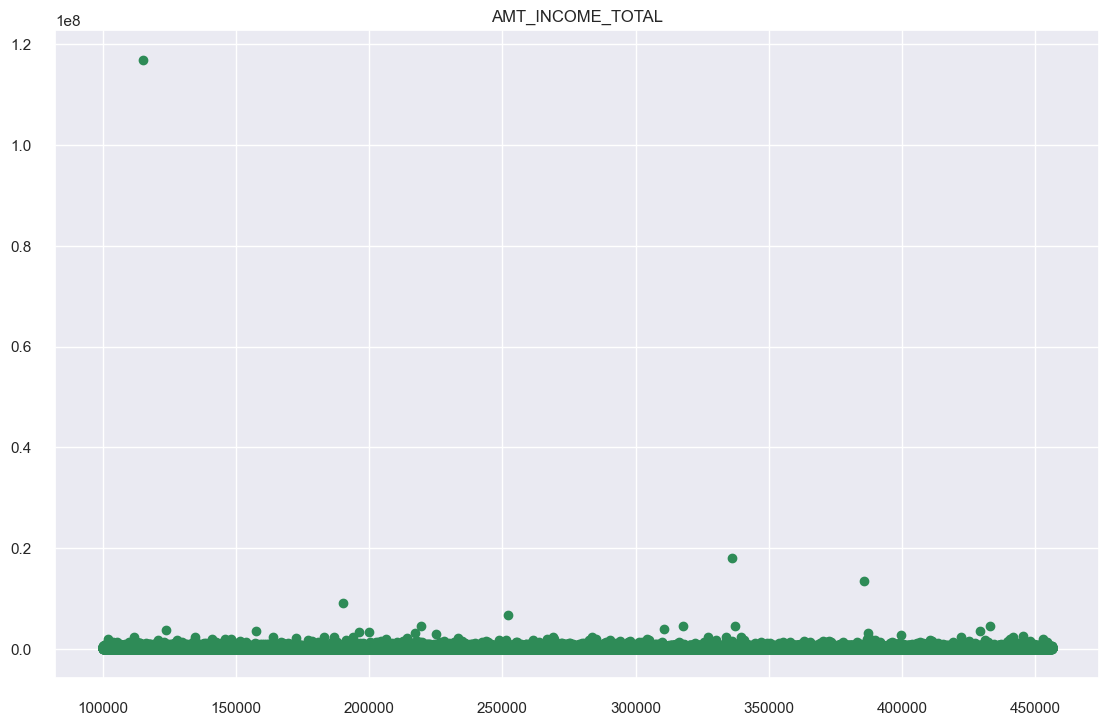

In [190]:
# Identifying Outliers 
plt.scatter(x=Application_Data['SK_ID_CURR'],y=Application_Data['AMT_INCOME_TOTAL'],color='seagreen')
plt.title('AMT_INCOME_TOTAL')
plt.show()


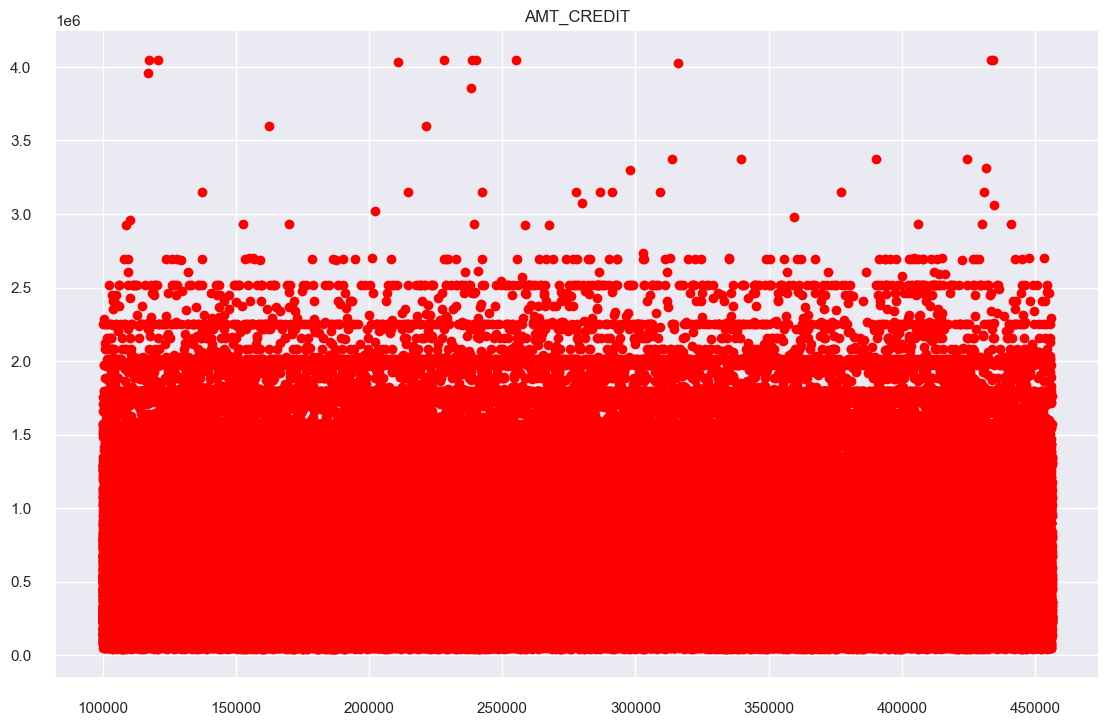

In [181]:
# Identifying Outliers 
plt.scatter(x=Application_Data['SK_ID_CURR'],y=Application_Data['AMT_CREDIT'],color='red')
plt.title('AMT_CREDIT')
plt.show()

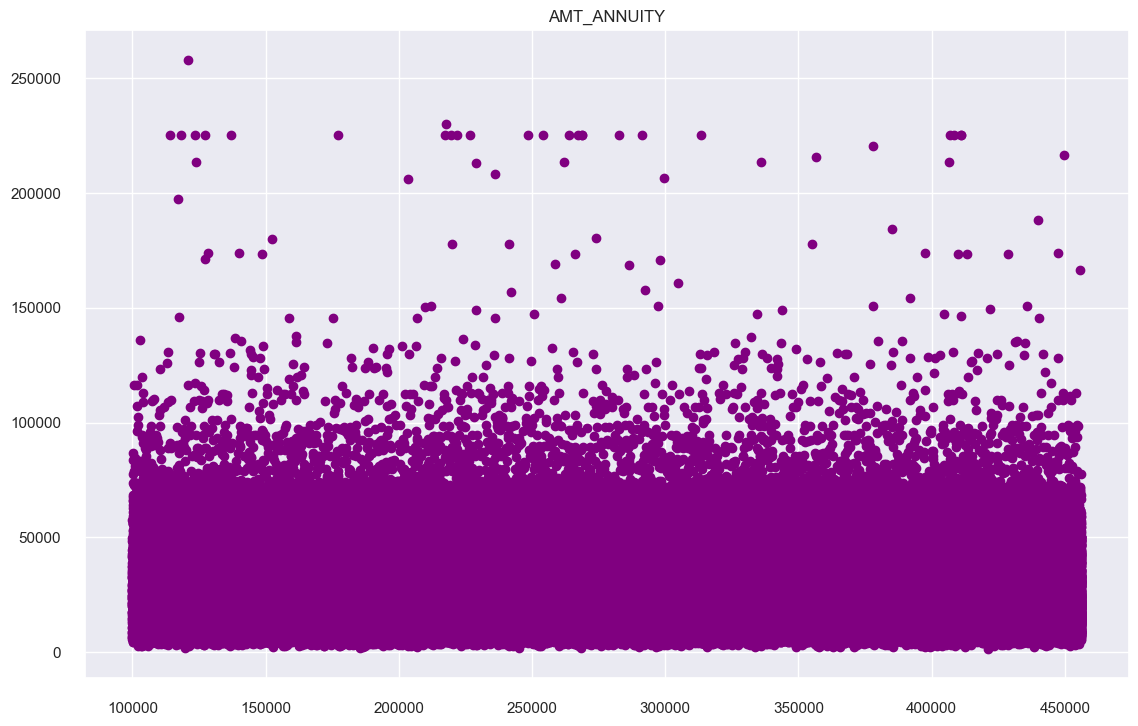

In [182]:
# Identifying Outliers 
plt.scatter(x=Application_Data['SK_ID_CURR'],y=Application_Data['AMT_ANNUITY'],color='PURPLE')
plt.title('AMT_ANNUITY')
plt.show()


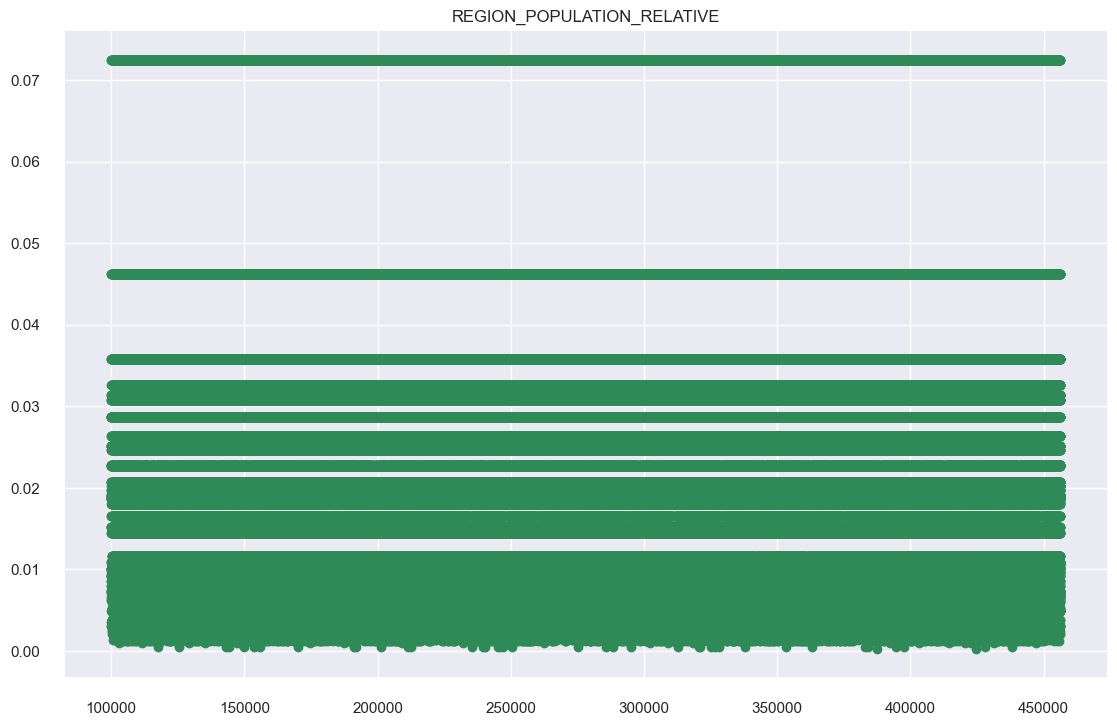

In [192]:
# Identifying Outliers 
plt.scatter(x=Application_Data['SK_ID_CURR'],y=Application_Data['REGION_POPULATION_RELATIVE'],color='seagreen')
plt.title('REGION_POPULATION_RELATIVE')
plt.show()

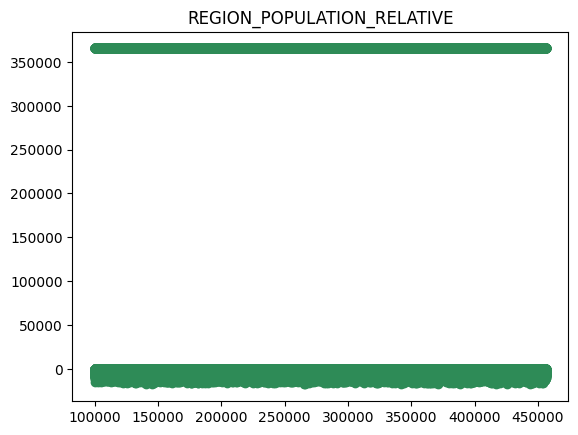

In [20]:
# Identifying Outliers 
plt.scatter(x=Application_Data['SK_ID_CURR'],y=Application_Data['DAYS_EMPLOYED'],color='seagreen')
plt.title('REGION_POPULATION_RELATIVE')
plt.show()

**Insights:**  
    1. AMT_ANNUITY, AMT_CREDIT, HOUR_APPR_PROCESS_START have some number of outliers.  
    2. AMT_INCOME have huge outliers.  
    3.In REGION_POPULATION_RELATIVE, wefound no client have 0.06 region_population_relative.

# 3.B.Understanding Outliers in Previous_Application

In [34]:
Previous_Application.T

0               1        \
SK_ID_PREV                                 2030495         2802425   
SK_ID_CURR                                  271877          108129   
NAME_CONTRACT_TYPE                  Consumer loans      Cash loans   
AMT_ANNUITY                                1730.43       25188.615   
AMT_APPLICATION                            17145.0        607500.0   
AMT_CREDIT                                 17145.0        679671.0   
AMT_DOWN_PAYMENT                               0.0     6697.402139   
AMT_GOODS_PRICE                            17145.0        607500.0   
WEEKDAY_APPR_PROCESS_START                SATURDAY        THURSDAY   
HOUR_APPR_PROCESS_START                         15              11   
FLAG_LAST_APPL_PER_CONTRACT                      Y               Y   
NFLAG_LAST_APPL_IN_DAY                           1               1   
NAME_CASH_LOAN_PURPOSE                         XAP             XNA   
NAME_CONTRACT_STATUS                      Approved        Approved   
DAYS_DECISION                                  -73            -164   
NAME_PAYMENT_TYPE            Cash through the bank             XNA   
CODE_REJECT_REASON                             XAP             XAP   
NAME_CLIENT_TYPE                          Repeater        Repeater   
NAME_GOODS_CATEGORY                         Mobile             XNA   
NAME_PORTFOLIO                                 POS            Cash   
NAME_PRODUCT_TYPE                              XNA          x-sell   
CHANNEL_TYPE                          Country-wide  Contact center   
SELLERPLACE_AREA                                35              -1   
NAME_SELLER_INDUSTRY                  Connectivity             XNA   
CNT_PAYMENT                                   12.0            36.0   
NAME_YIELD_GROUP                            middle      low_action   

                                             2                        3        \
SK_ID_PREV                                   2523466                  2819243   
SK_ID_CURR                                    122040                   176158   
NAME_CONTRACT_TYPE                        Cash loans               Cash loans   
AMT_ANNUITY                                15060.735                47041.335   
AMT_APPLICATION                             112500.0                 450000.0   
AMT_CREDIT                                  136444.5                 470790.0   
AMT_DOWN_PAYMENT                         6697.402139              6697.402139   
AMT_GOODS_PRICE                             112500.0                 450000.0   
WEEKDAY_APPR_PROCESS_START                   TUESDAY                   MONDAY   
HOUR_APPR_PROCESS_START                           11                        7   
FLAG_LAST_APPL_PER_CONTRACT                        Y                        Y   
NFLAG_LAST_APPL_IN_DAY                             1                        1   
NAME_CASH_LOAN_PURPOSE                           XNA                      XNA   
NAME_CONTRACT_STATUS                        Approved                 Approved   
DAYS_DECISION                                   -301                     -512   
NAME_PAYMENT_TYPE              Cash through the bank    Cash through the bank   
CODE_REJECT_REASON                               XAP                      XAP   
NAME_CLIENT_TYPE                            Repeater                 Repeater   
NAME_GOODS_CATEGORY                              XNA                      XNA   
NAME_PORTFOLIO                                  Cash                     Cash   
NAME_PRODUCT_TYPE                             x-sell                   x-sell   
CHANNEL_TYPE                 Credit and cash offices  Credit and cash offices   
SELLERPLACE_AREA                                  -1                       -1   
NAME_SELLER_INDUSTRY                             XNA                      XNA   
CNT_PAYMENT                                     12.0                     12.0   
NAME_YIELD_GROUP                              

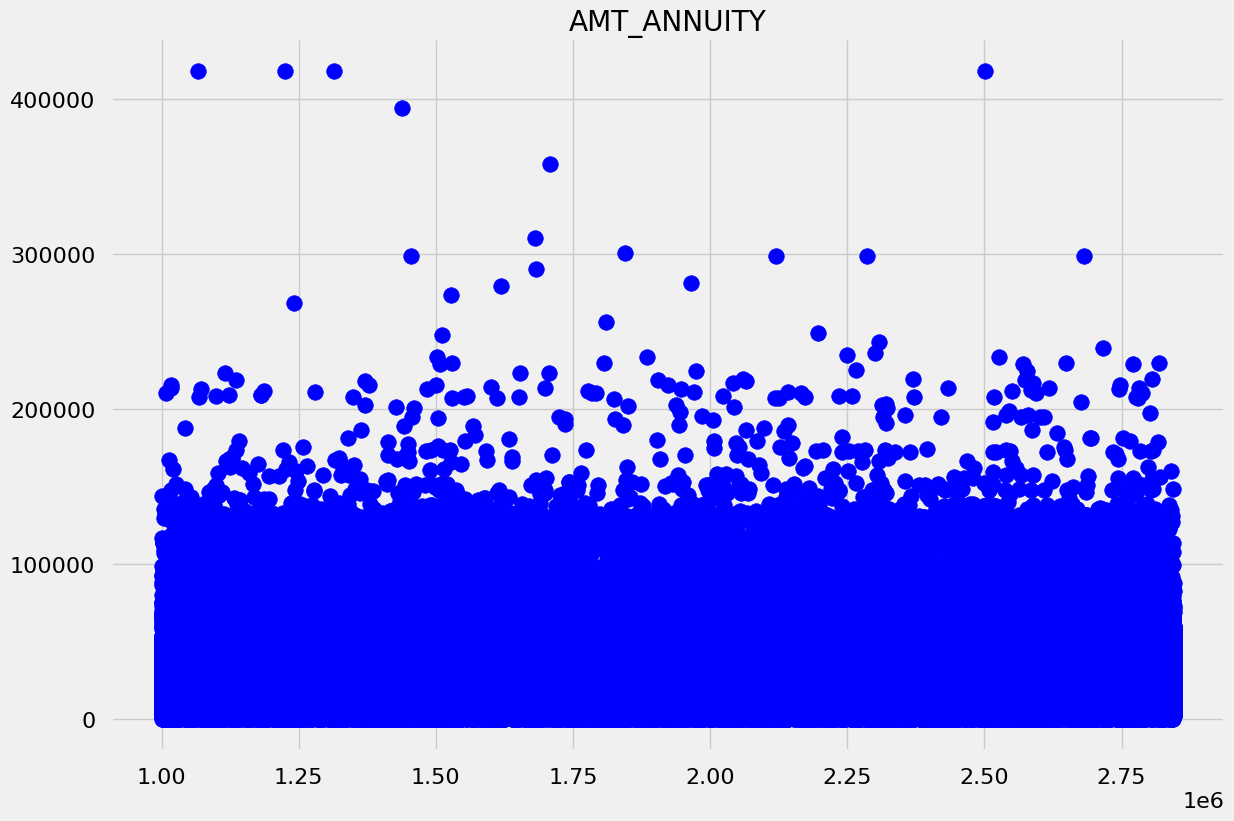

In [54]:
# Identifying Outliers 
plt.scatter(x=Previous_Application['SK_ID_PREV'],y=Previous_Application['AMT_ANNUITY'],color='blue')
plt.title('AMT_ANNUITY')
plt.show()

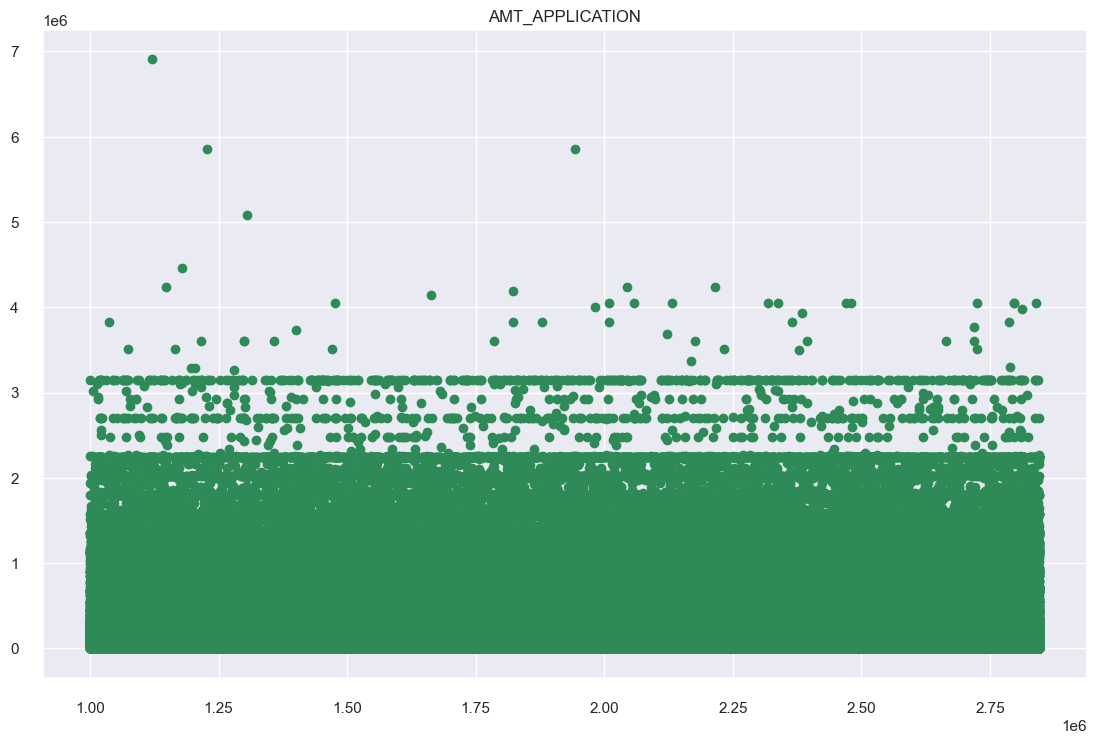

In [199]:
# Identifying Outliers 

plt.scatter(x=Previous_Application['SK_ID_PREV'],y=Previous_Application['AMT_APPLICATION'],color='seagreen')
plt.title('AMT_APPLICATION')
plt.show()

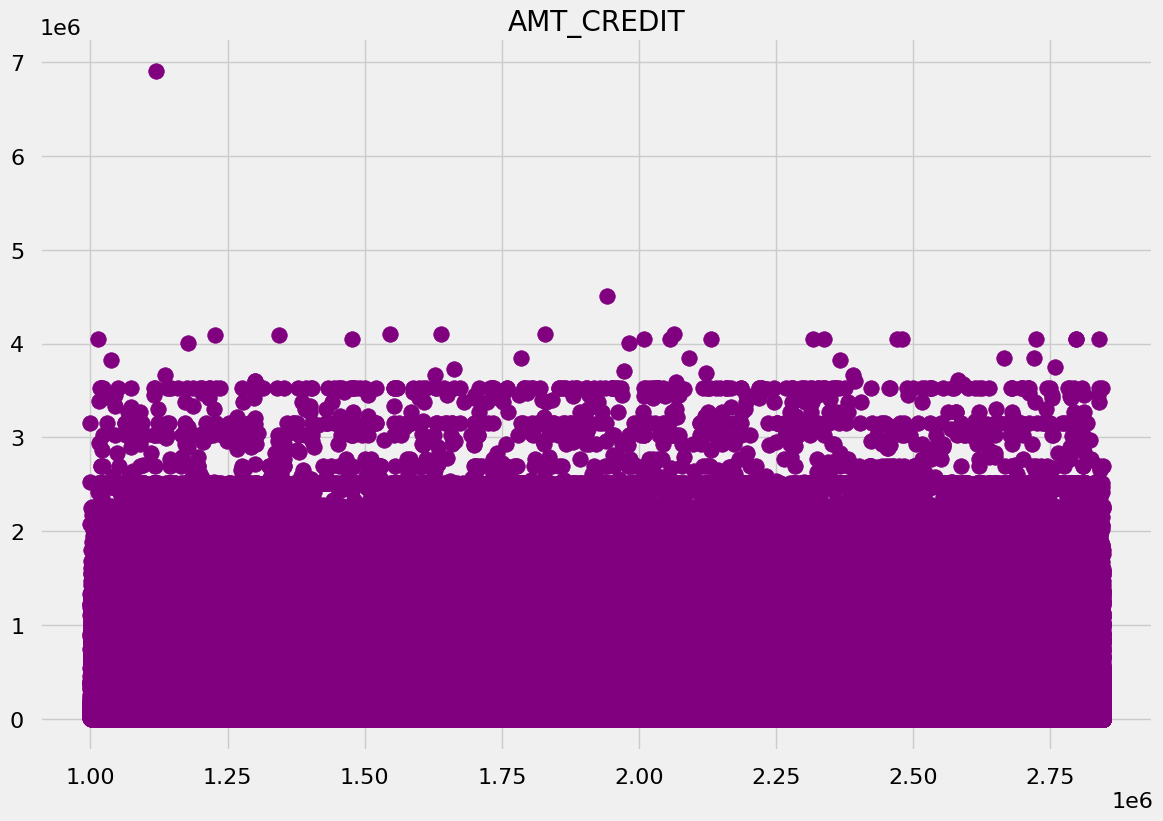

In [44]:
# Identifying Outliers 
plt.scatter(x=Previous_Application['SK_ID_PREV'],y=Previous_Application['AMT_CREDIT'],color='PURPLE')
plt.title('AMT_CREDIT')
plt.show()

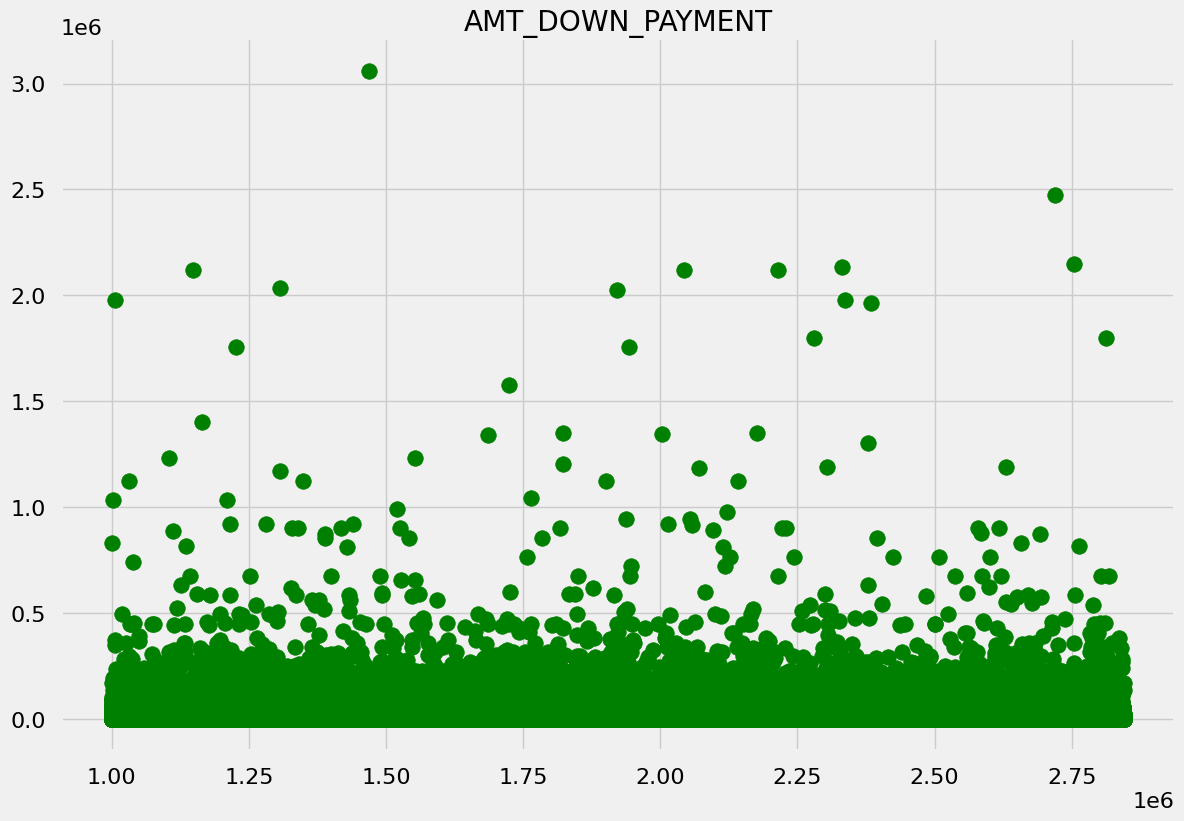

In [47]:
# Identifying Outliers 
plt.scatter(x=Previous_Application['SK_ID_PREV'],y=Previous_Application['AMT_DOWN_PAYMENT'],color='Green')
plt.title('AMT_DOWN_PAYMENT')
plt.show()

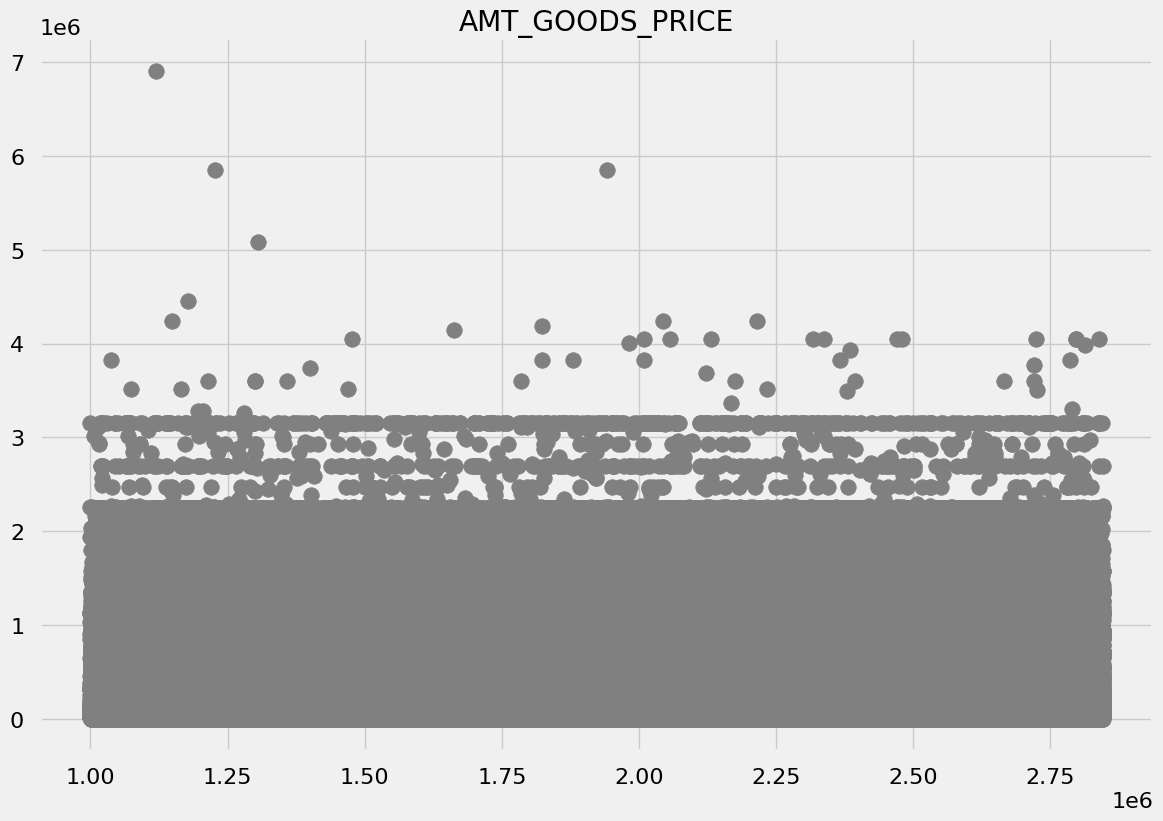

In [48]:
# Identifying Outliers 
plt.scatter(x=Previous_Application['SK_ID_PREV'],y=Previous_Application['AMT_GOODS_PRICE'],color='Grey')
plt.title('AMT_GOODS_PRICE')
plt.show()


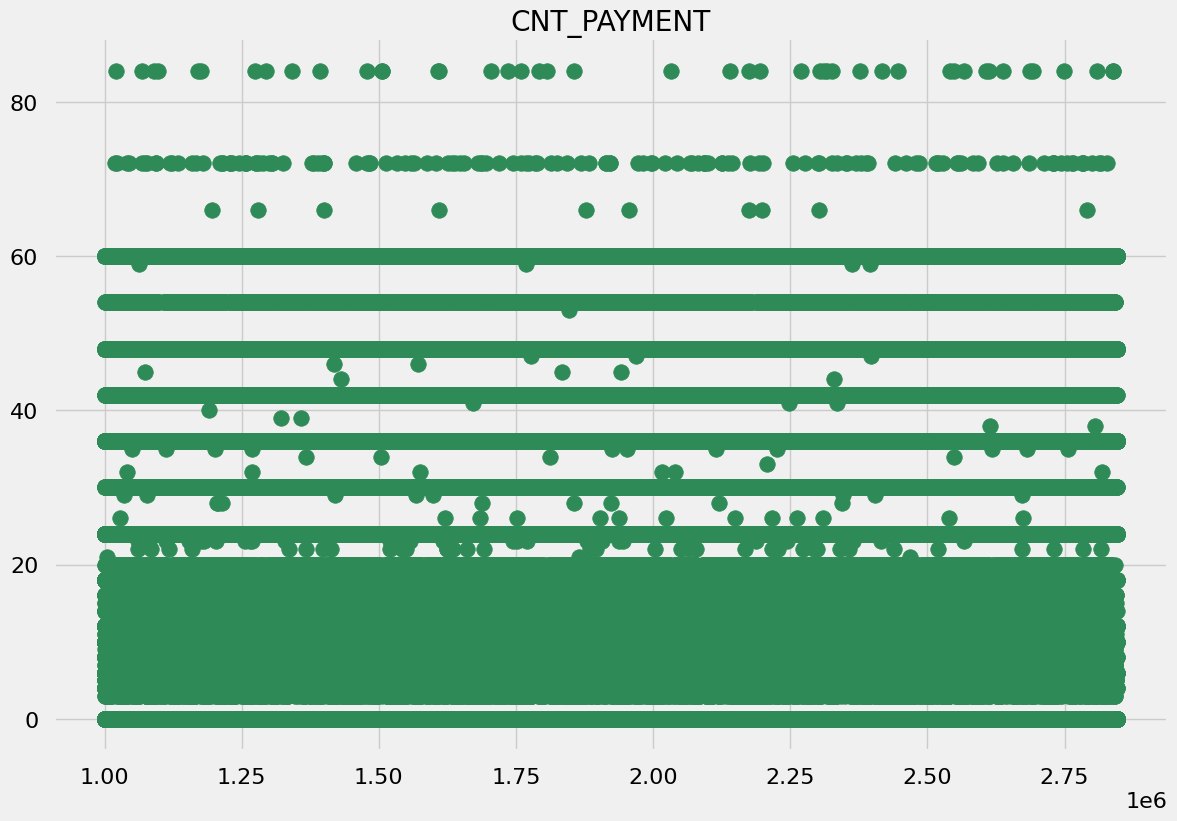

In [53]:
# Identifying Outliers 

plt.scatter(x=Previous_Application['SK_ID_PREV'],y=Previous_Application['CNT_PAYMENT'],color='seagreen')
plt.title('CNT_PAYMENT')
plt.show()

**Insights:**  
    1. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT,AMT_GOODS_PRICE have huge number of outliers.  
    2. CNT_PAYMENT has few outlier values.

## Data Imbalance

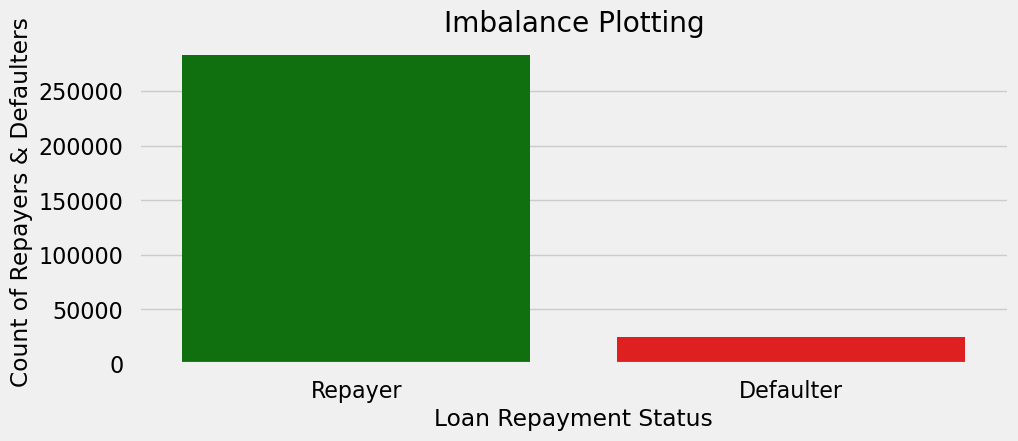

In [72]:
Imbalance = Application_Data["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [20]:
#Segmenting dataset w.r.t to target variable
target0_Application_Data=Application_Data.loc[Application_Data["TARGET"]==0] # With other cases (defaulters)
target1_Application_Data=Application_Data.loc[Application_Data["TARGET"]==1] # With payment difficulties (Repayers)

In [52]:
# Calculating Imbalance percentage
print('The imbalance ratio :' ,round(len(target0_Application_Data)/len(target1_Application_Data),2))

The imbalance ratio : 11.39


## 4. Univariate Analysis

In [22]:
# Count plotting in logarithmic scale

def uniplot(Application_Data,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(Application_Data[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = Application_Data, x= col, order=Application_Data[col].value_counts().index,hue = hue,palette=["lawngreen", "magenta"]) 
        
    plt.show()

## 4.A.Univariate Analysis for target 0

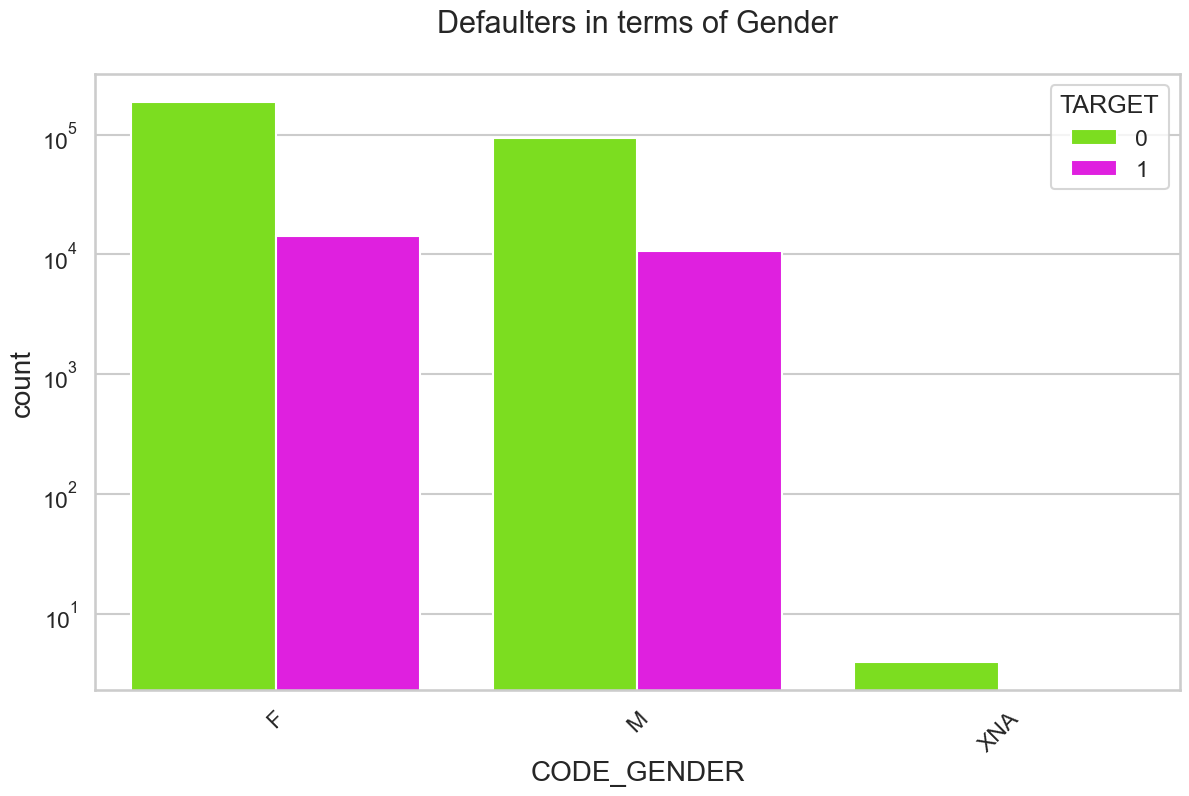

In [24]:
# PLotting for gender with target 1 and 0

uniplot(Application_Data,col='CODE_GENDER',title='Defaulters in terms of Gender',hue='TARGET')

C:\Users\sami\AppData\Local\Temp\ipykernel_30420\3300527638.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


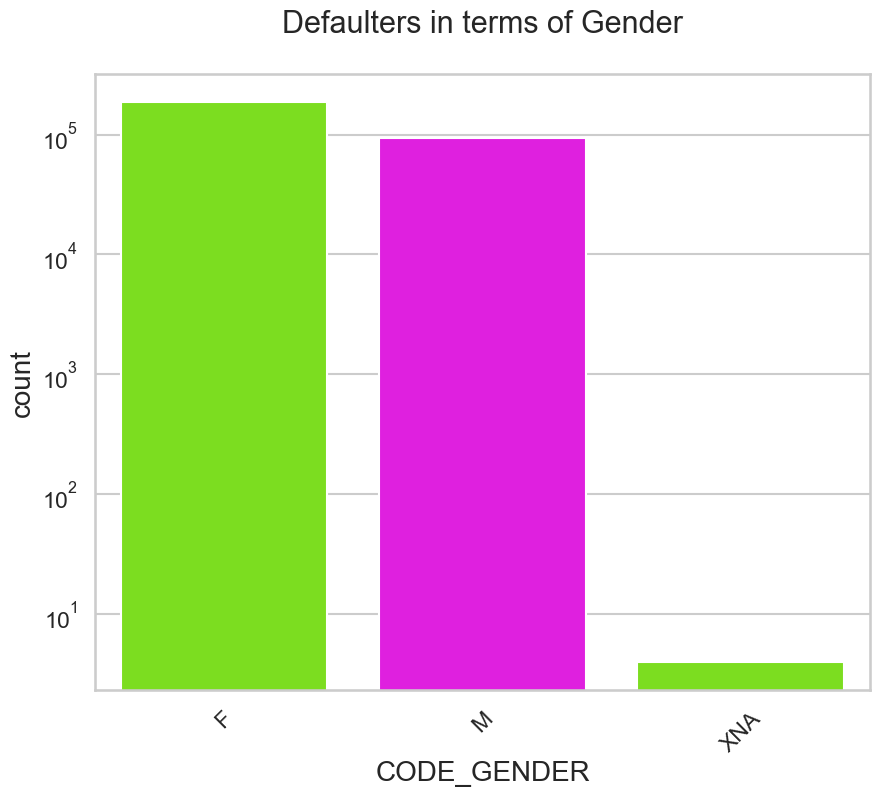

In [25]:
# PLotting for gender 

uniplot(target0_Application_Data,col='CODE_GENDER',title='Defaulters in terms of Gender')

Females have overtaken males in terms of not repaying the loan 

In [27]:
target0_Application_Data['CODE_GENDER'].value_counts(normalize=True)*100

F      66.603228
M      33.395357
XNA     0.001415
Name: CODE_GENDER, dtype: float64

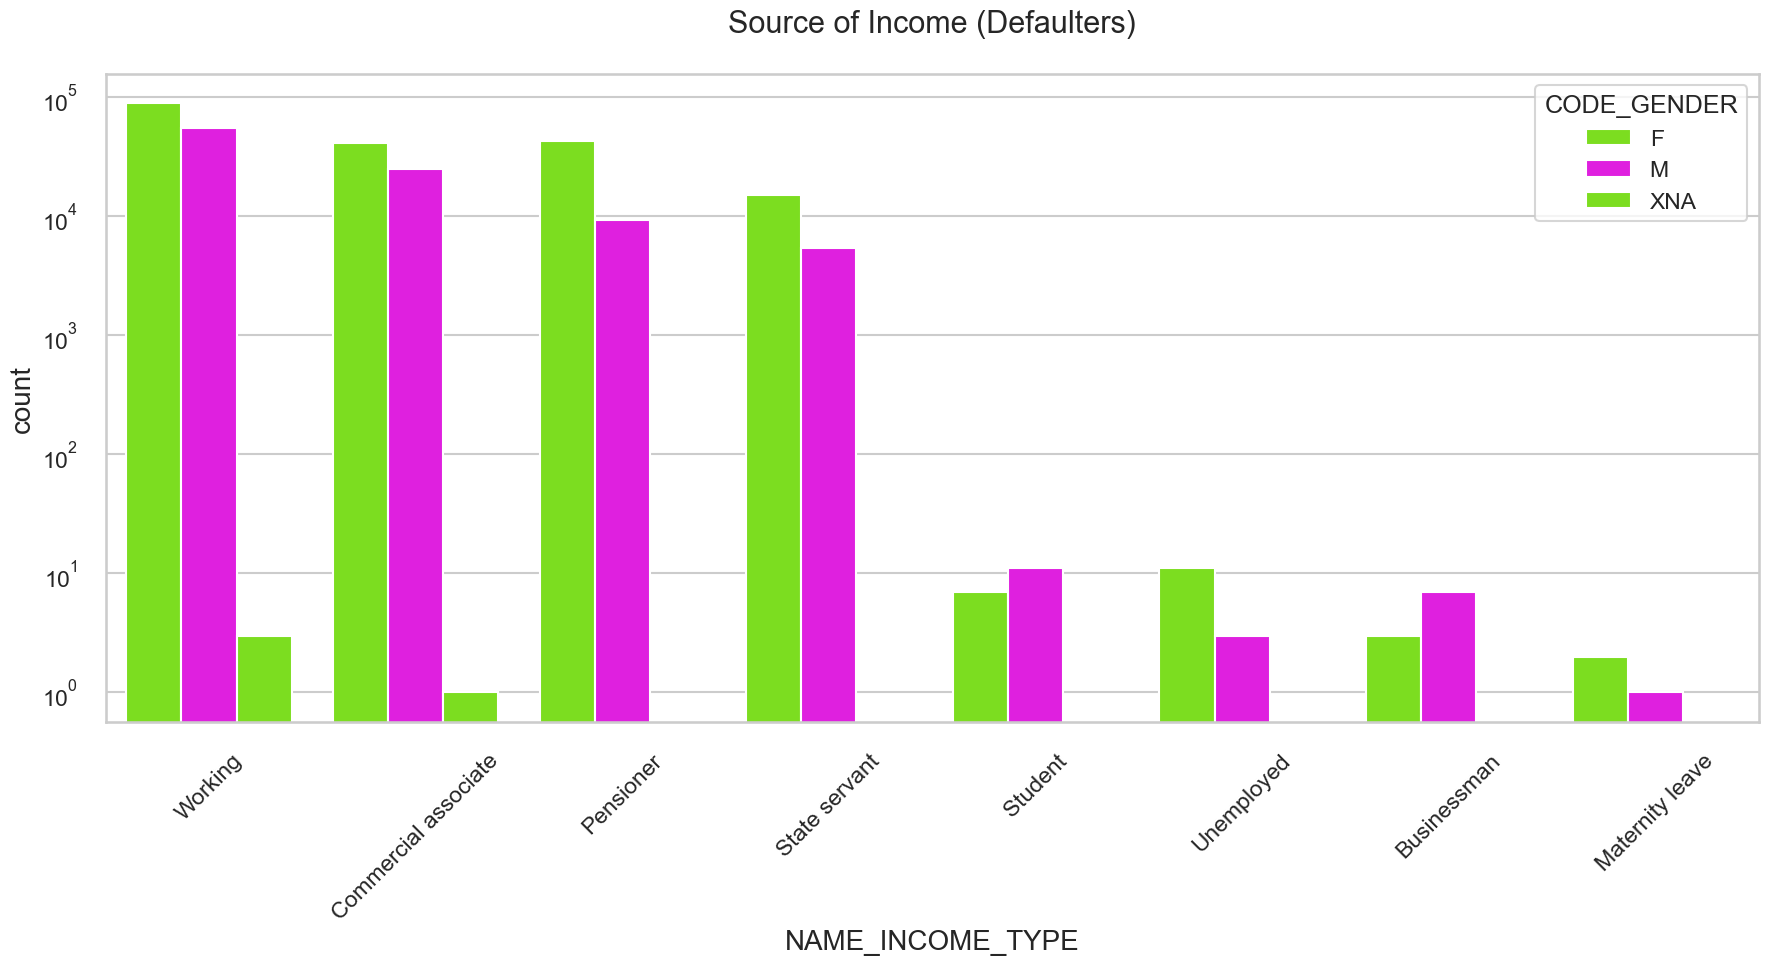

In [166]:
# PLotting for income range

uniplot(target0_Application_Data,col='NAME_INCOME_TYPE',title='Source of Income (Defaulters)',hue='CODE_GENDER')

In [107]:
target0_Application_Data['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64

1. Most of Females have 'Working' as source of income.
2. As compared to male, females are in larger number in terms of not repaying the loan.
3. Meanwhile, Commercial Associates (both female and males) have great contribution in defaulters.
4. Maternity leave people have least defaulter values.

In [59]:
# Creating bins for income amount
Application_Data['AMT_INCOME_TOTAL'] = Application_Data['AMT_INCOME_TOTAL'] * 100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1LaKh','1LaKh-2Lakh', '2Lakh-3Lakh','3Lakh-4Lakh','4Lakh-5Lakh','5Lakh-6Lakh','8Lakh-7Lakh','7Lakh-8Lakh',
       '8Lakh-9Lakh','9Lakh-1M', '1M Above']

Application_Data['AMT_INCOME_RANGE'] = pd.cut(Application_Data['AMT_INCOME_TOTAL'], bins, labels=slot)

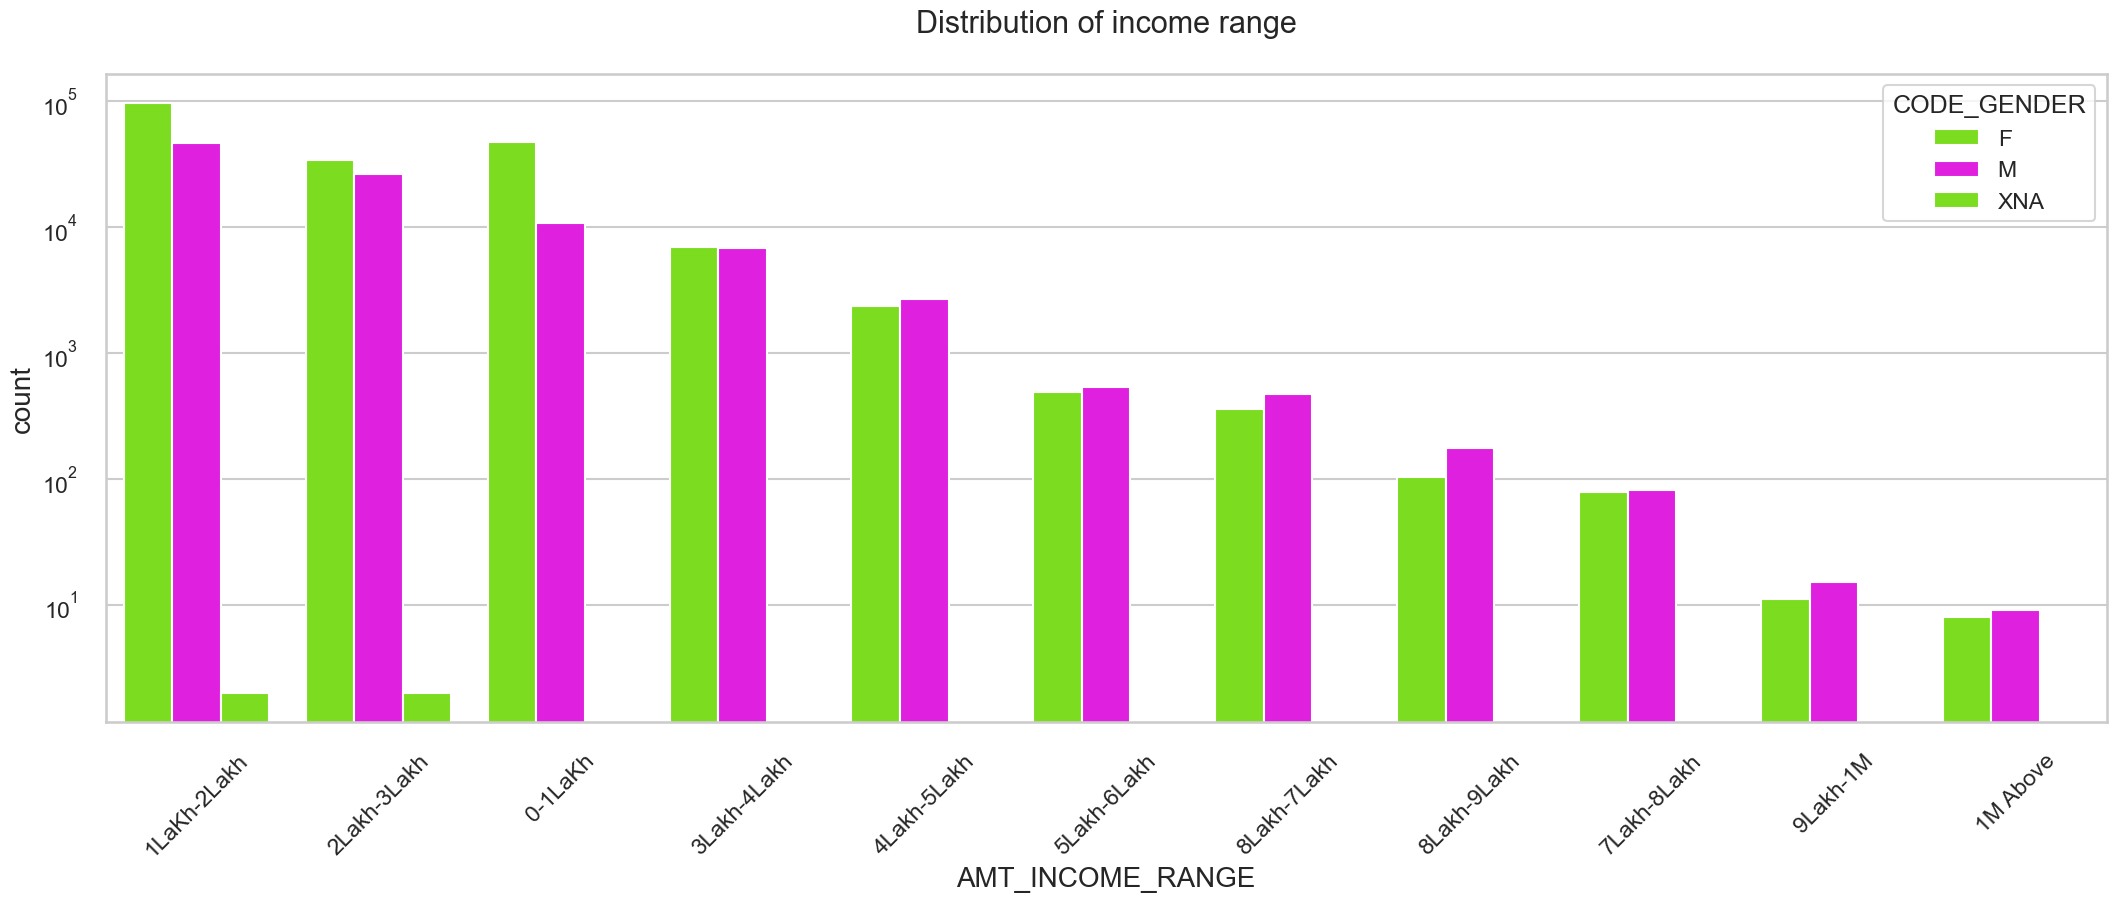

In [69]:
# PLotting for income range

uniplot(target0_Application_Data,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

In [81]:
target0_Application_Data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

1LaKh-2Lakh    50.474039
2Lakh-3Lakh    21.331771
0-1LaKh        20.700899
3Lakh-4Lakh     4.882358
4Lakh-5Lakh     1.783932
5Lakh-6Lakh     0.363230
8Lakh-7Lakh     0.292779
8Lakh-9Lakh     0.099481
7Lakh-8Lakh     0.056290
9Lakh-1M        0.009205
1M Above        0.006018
Name: AMT_INCOME_RANGE, dtype: float64

Here, we can see most of the defaulters have income between 1Lakh-2Lakh whereas approx.  
Rich clients (income above 1M) are less in defaulters line.  
20% defaulters have income less than a Lakh.


In [37]:
# Creating bins for Credit amount
Application_Data['AMT_CREDIT'] = Application_Data['AMT_CREDIT']/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1LaKh','1LaKh-2Lakh', '2Lakh-3Lakh','3Lakh-4Lakh','4Lakh-5Lakh','5Lakh-6Lakh','8Lakh-7Lakh','7Lakh-8Lakh',
       '8Lakh-9Lakh','9Lakh-1M', '1M Above']

Application_Data['AMT_CREDIT_RANGE']=pd.cut(Application_Data['AMT_CREDIT'],bins=bins,labels=slots)

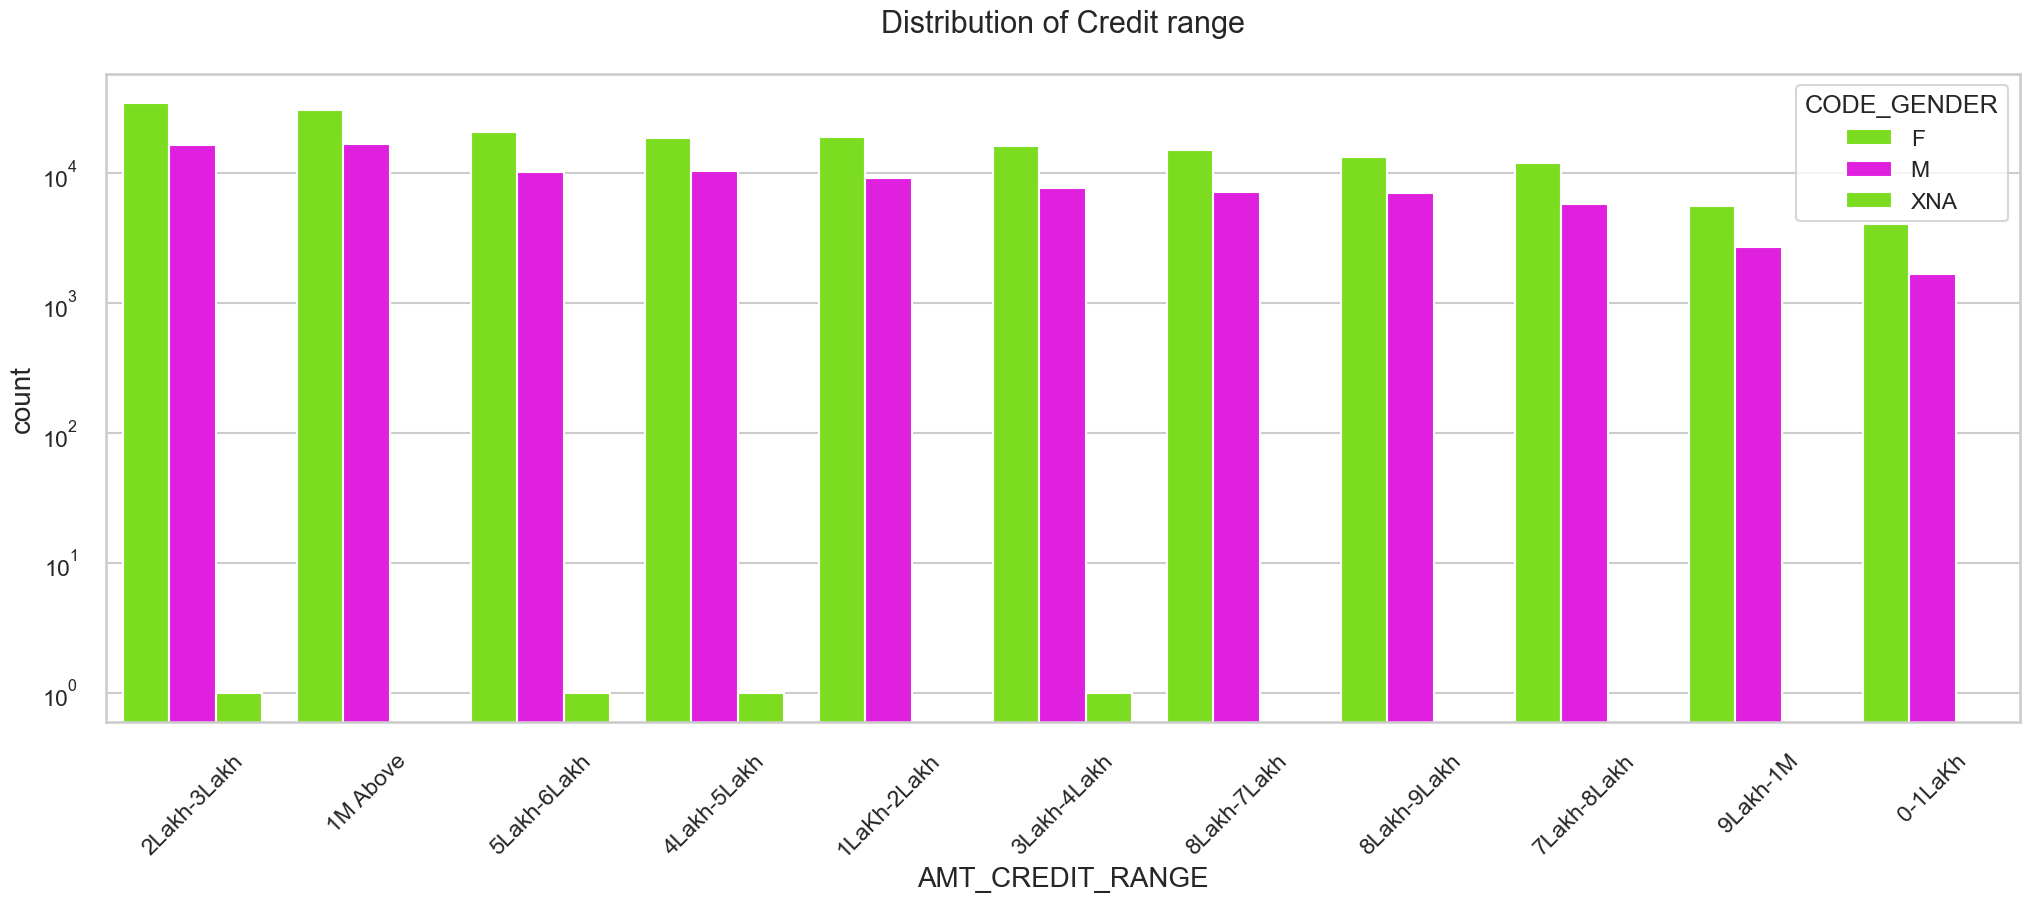

In [70]:
# PLotting for income range
uniplot(target0_Application_Data,col='AMT_CREDIT_RANGE',title='Distribution of Credit range',hue='CODE_GENDER')

In [80]:
target0_Application_Data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

2Lakh-3Lakh    17.861514
1M Above       16.644970
5Lakh-6Lakh    10.863290
4Lakh-5Lakh    10.211684
1LaKh-2Lakh     9.898262
3Lakh-4Lakh     8.389167
8Lakh-7Lakh     7.765507
8Lakh-9Lakh     7.158826
7Lakh-8Lakh     6.270915
9Lakh-1M        2.929045
0-1LaKh         2.006820
Name: AMT_CREDIT_RANGE, dtype: float64

More than 16% of people usesd loan money above 10 lakh as for their advantage.  
Meanwhile, loans ranging from 2Lakh-3Lakh are taken with the intention of not repaying where female are in large numbers.

C:\Users\sami\AppData\Local\Temp\ipykernel_22552\3300527638.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


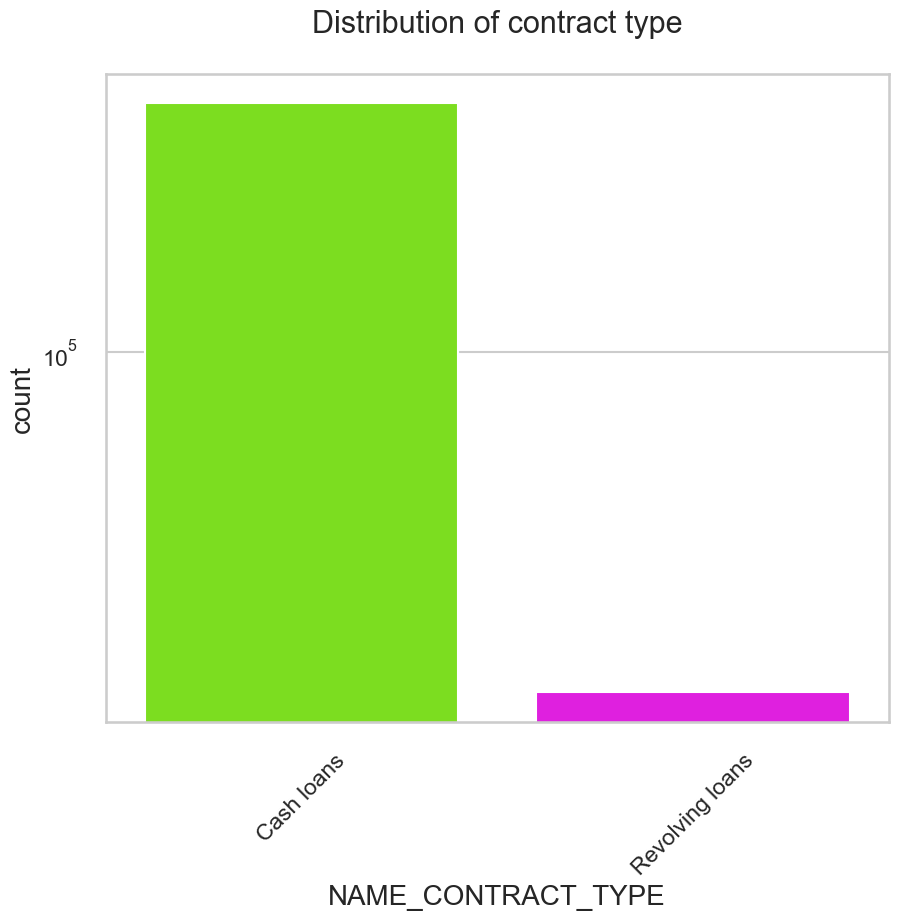

In [150]:
# Plotting for Contract type
uniplot(target0_Application_Data,col='NAME_CONTRACT_TYPE',title='Distribution of contract type')

In [88]:
target0_Application_Data['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans         90.209986
Revolving loans     9.790014
Name: NAME_CONTRACT_TYPE, dtype: float64

**Hence as compare to revolving loans, cash loans are taken in bulk**  
**Almost clients applied for cash loan later they turned into defaulters**

C:\Users\sami\AppData\Local\Temp\ipykernel_22552\3300527638.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


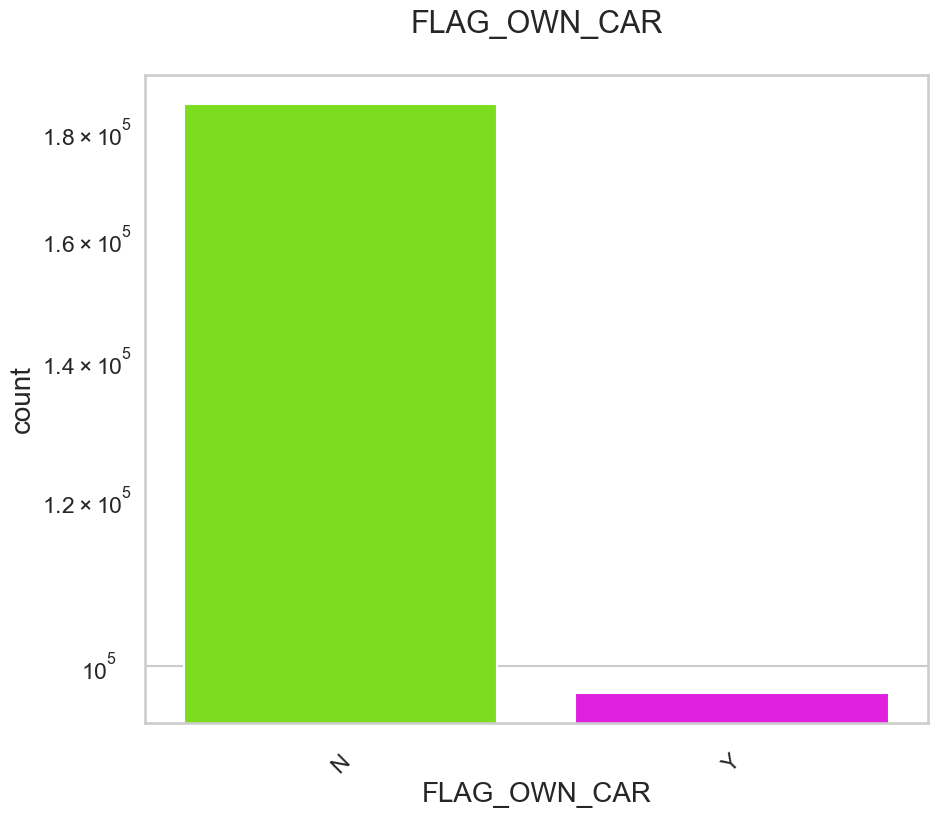

C:\Users\sami\AppData\Local\Temp\ipykernel_22552\3300527638.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


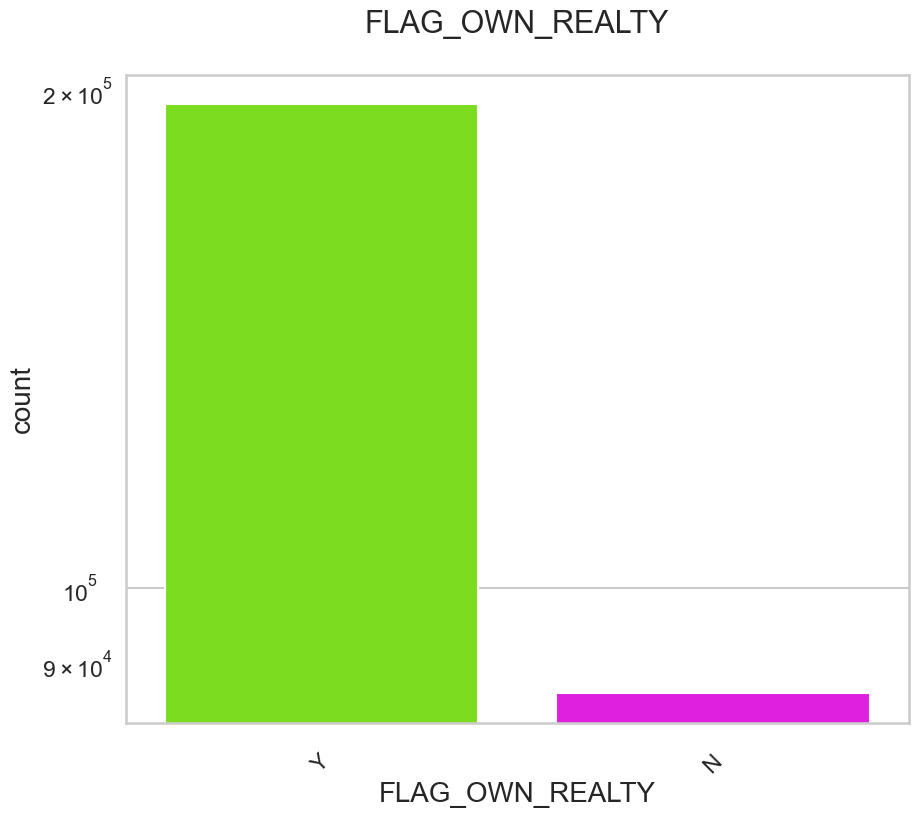

In [152]:
uniplot(target0_Application_Data,col='FLAG_OWN_CAR',title='FLAG_OWN_CAR')
uniplot(target0_Application_Data,col='FLAG_OWN_REALTY',title='FLAG_OWN_REALTY')

In [148]:
target0_Application_Data['FLAG_OWN_CAR'].value_counts(normalize=True)*100

N    65.682418
Y    34.317582
Name: FLAG_OWN_CAR, dtype: float64

In [149]:
target0_Application_Data['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

Y    69.451264
N    30.548736
Name: FLAG_OWN_REALTY, dtype: float64

**Insights:**  
1. Clients having no car have more defaulter rate 
2. In case of not returning loan, clients having a house or flat in large number.

<Figure size 1500x3000 with 0 Axes>

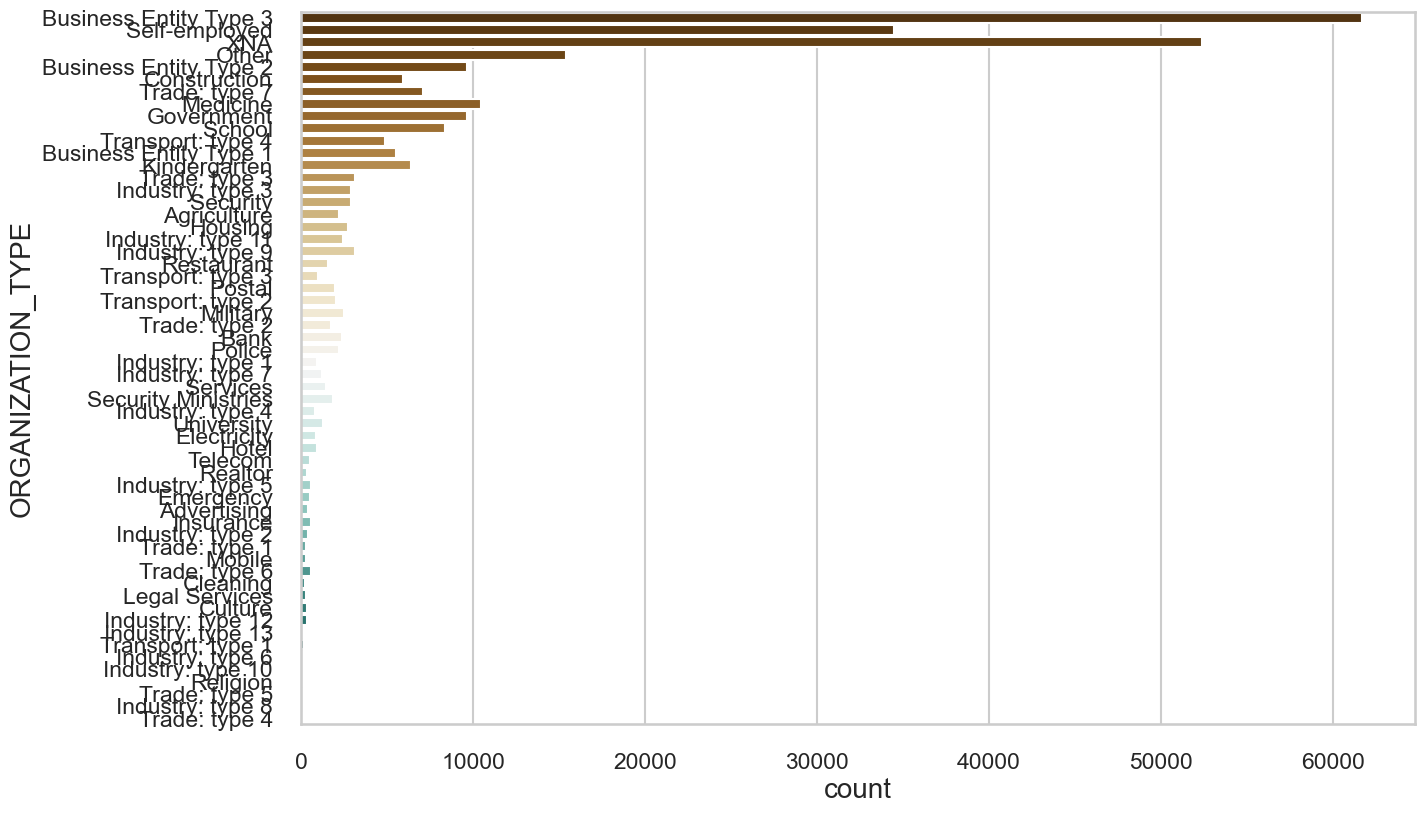

<Figure size 1500x3000 with 0 Axes>

In [154]:
#Organization type counts in case of TARGET-0 (not repaying loan)
sns.countplot(data=target0_Application_Data,y='ORGANIZATION_TYPE',order=target1_Application_Data['ORGANIZATION_TYPE'].value_counts().index,palette='BrBG')
plt.figure(figsize=(15,30))


Business Entity type 3 people have a big bar in defaulter case followed by Self-Employed people and other. 

## 4.B.Univariate Analysis for target 1

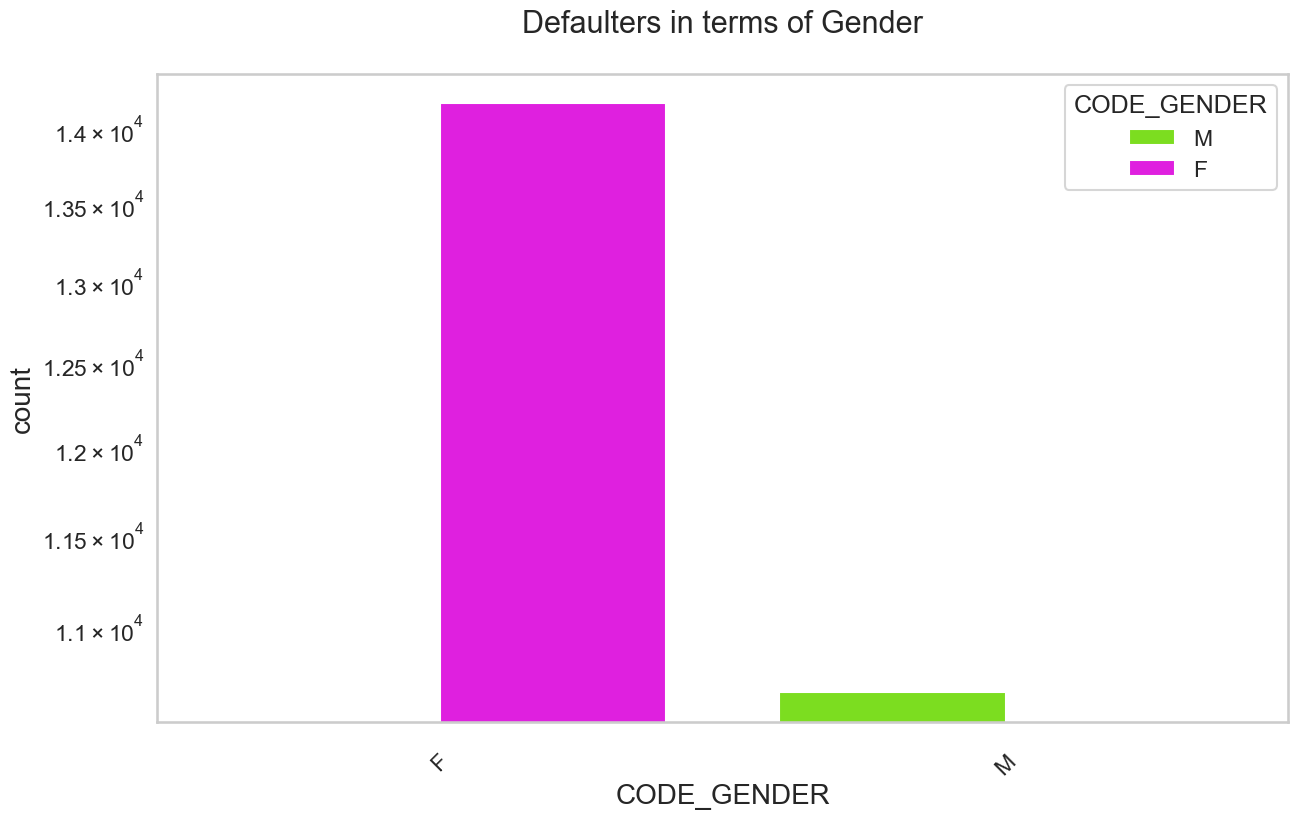

In [99]:
# PLotting for gender 

uniplot(target1_Application_Data,col='CODE_GENDER',title='Defaulters in terms of Gender',hue='CODE_GENDER')

In [97]:
target1_Application_Data['CODE_GENDER'].value_counts(normalize=True)*100

F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64

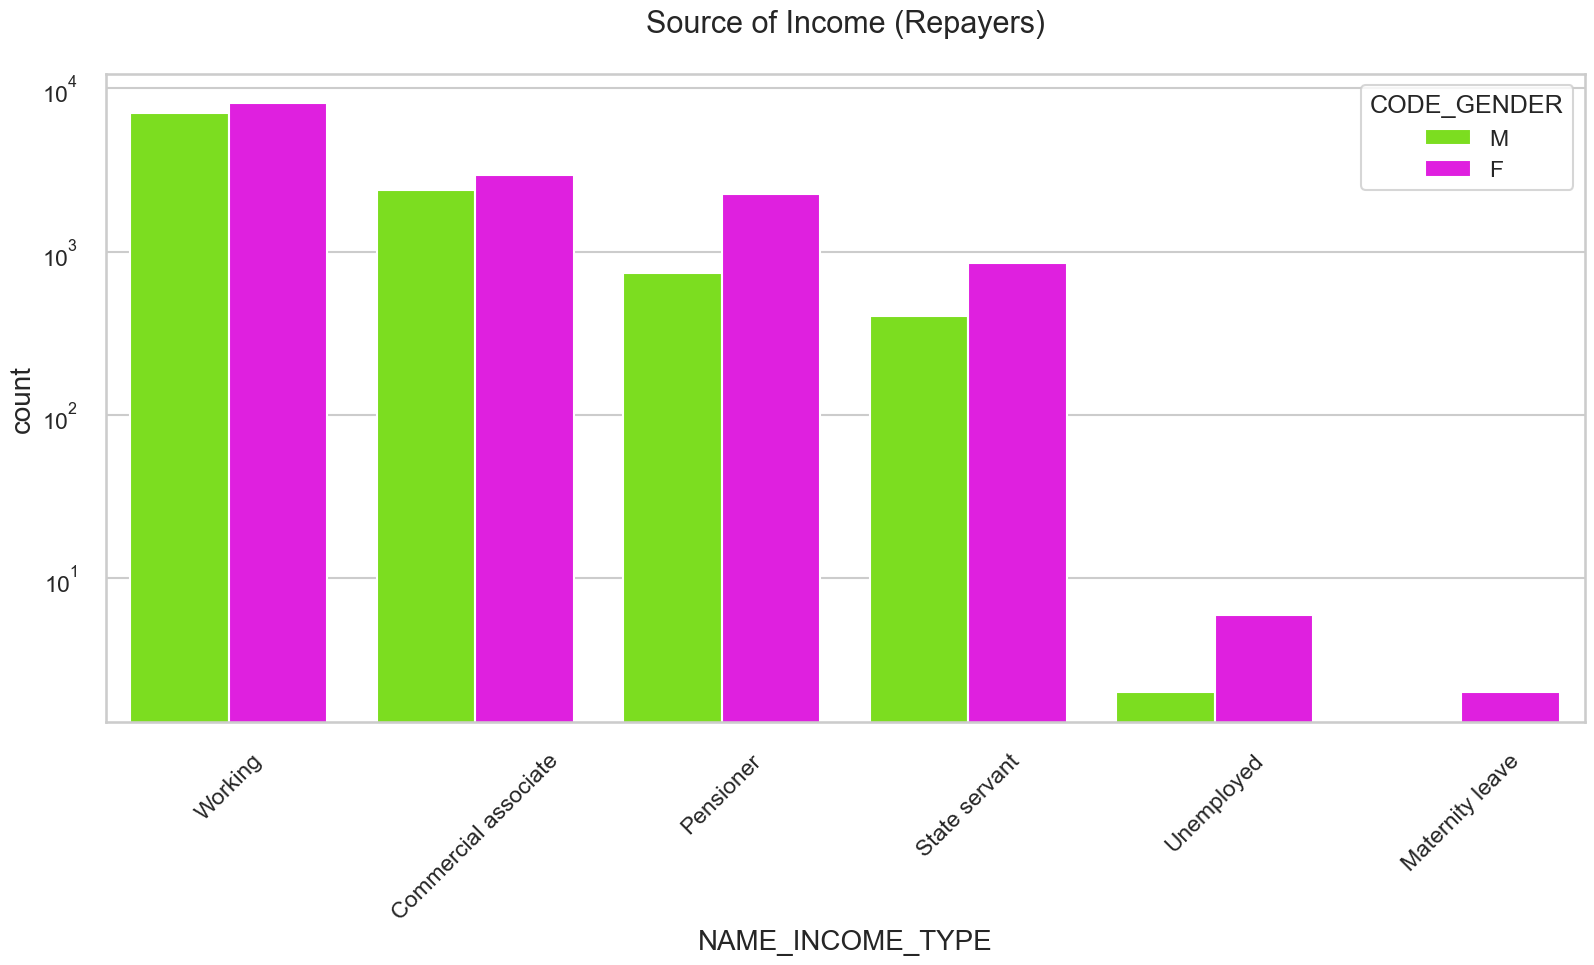

In [102]:
# PLotting for income range

uniplot(target1_Application_Data,col='NAME_INCOME_TYPE',title='Source of Income (Repayers)',hue='CODE_GENDER')

In [104]:
target1_Application_Data['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64

Here students and businessmen are missing where as people with 'working' as source income are leading.  
In terms of repaying loan, percentage of people got increased from 50% in defaulter rate to 61% in reapayment.

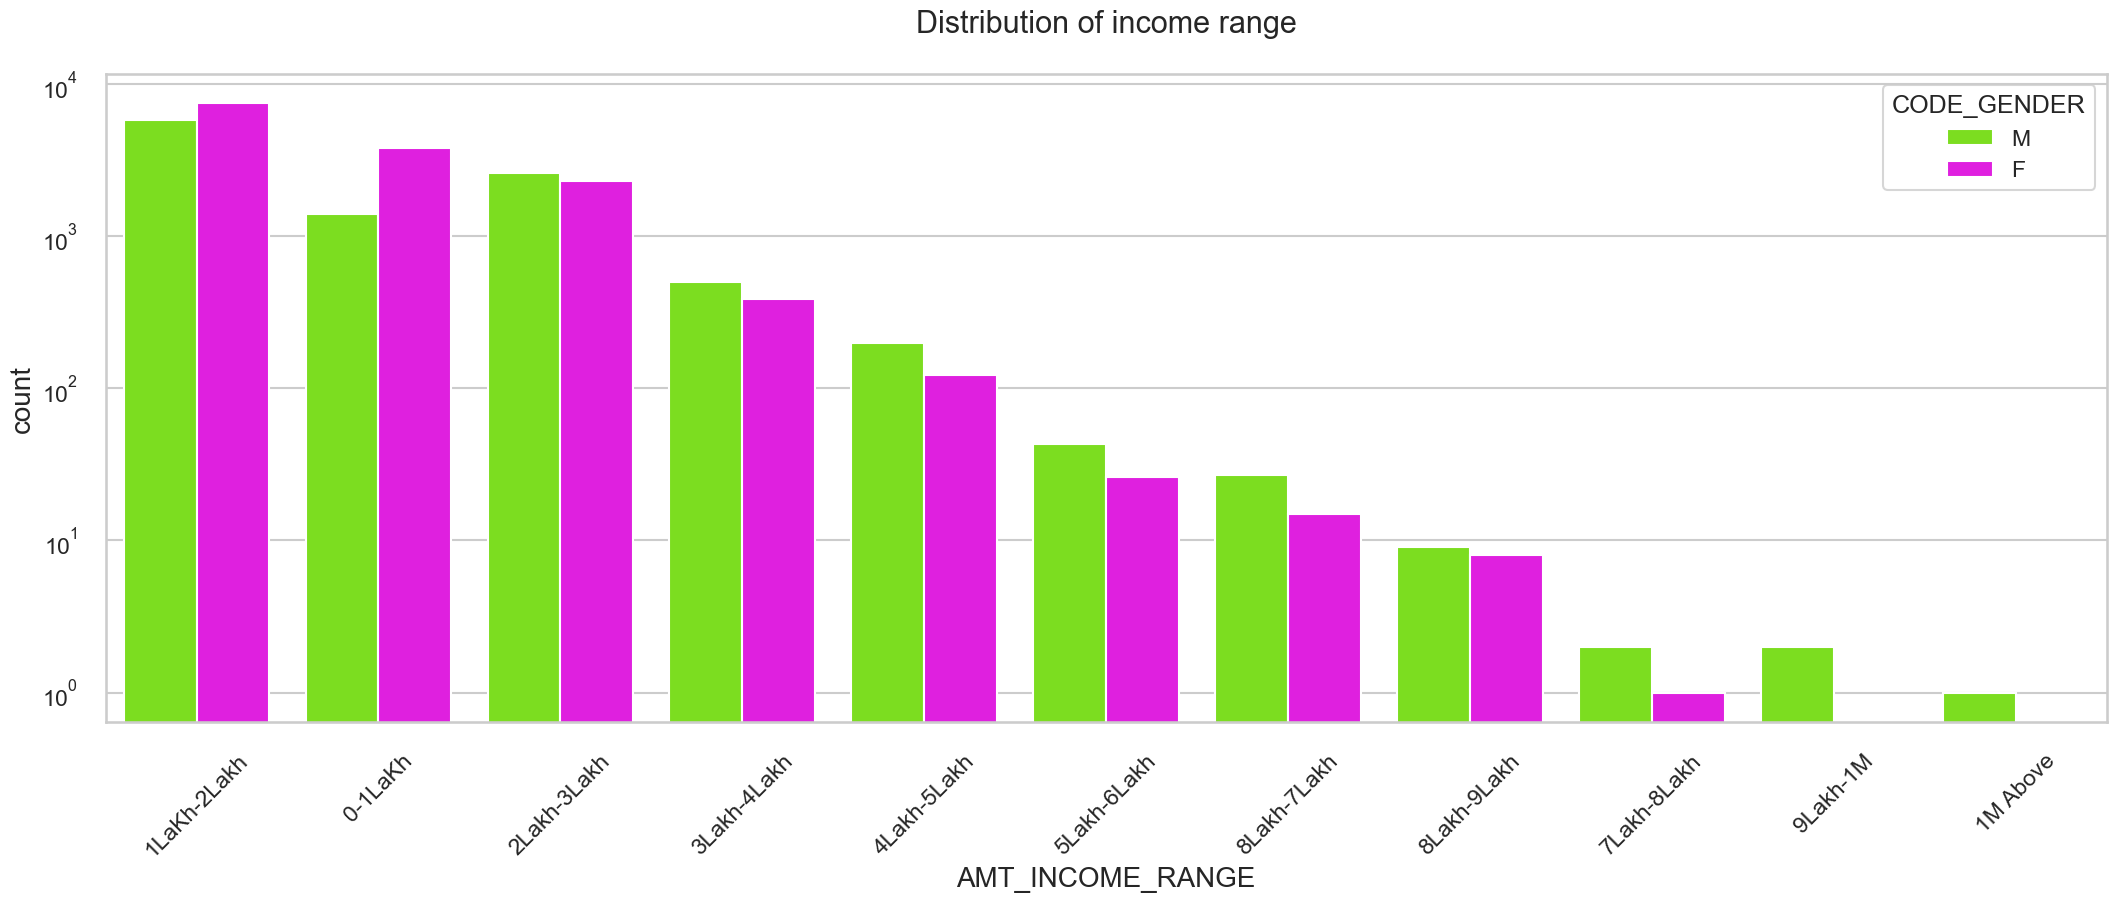

In [103]:
# PLotting for income range

uniplot(target1_Application_Data,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

People having income 2lakh-3lakh are in more number in case of not repaying loan where here in terms of returning loan they are in less numbers as compared to defaulters chart.  
Vice versa for the people having income less than or equal to 1Lakh they are in more number for returning loan as compared to defaulter status.

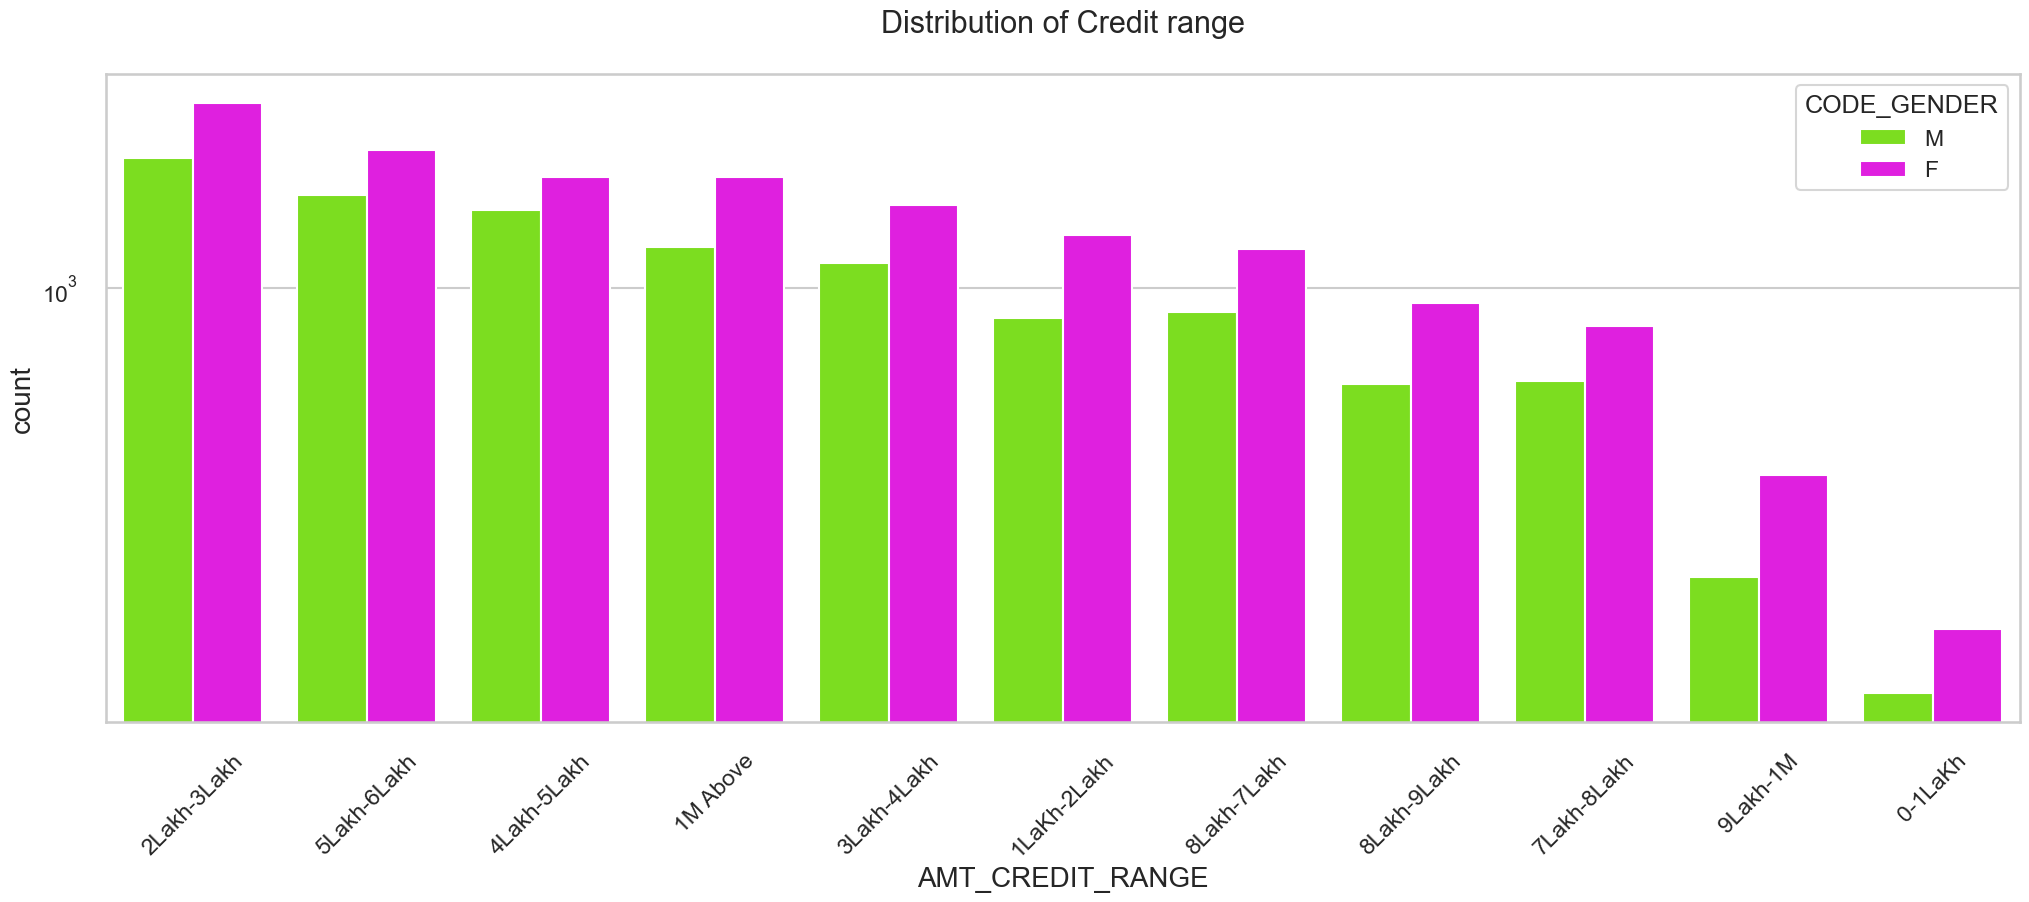

In [109]:
# PLotting for income range
uniplot(target1_Application_Data,col='AMT_CREDIT_RANGE',title='Distribution of Credit range',hue='CODE_GENDER')

Loan applicants applied for loan ranging between 2lakh-3Lakh have successully paid followed by loan application for between 5Lakh-6lakh.

C:\Users\sami\AppData\Local\Temp\ipykernel_22552\3300527638.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


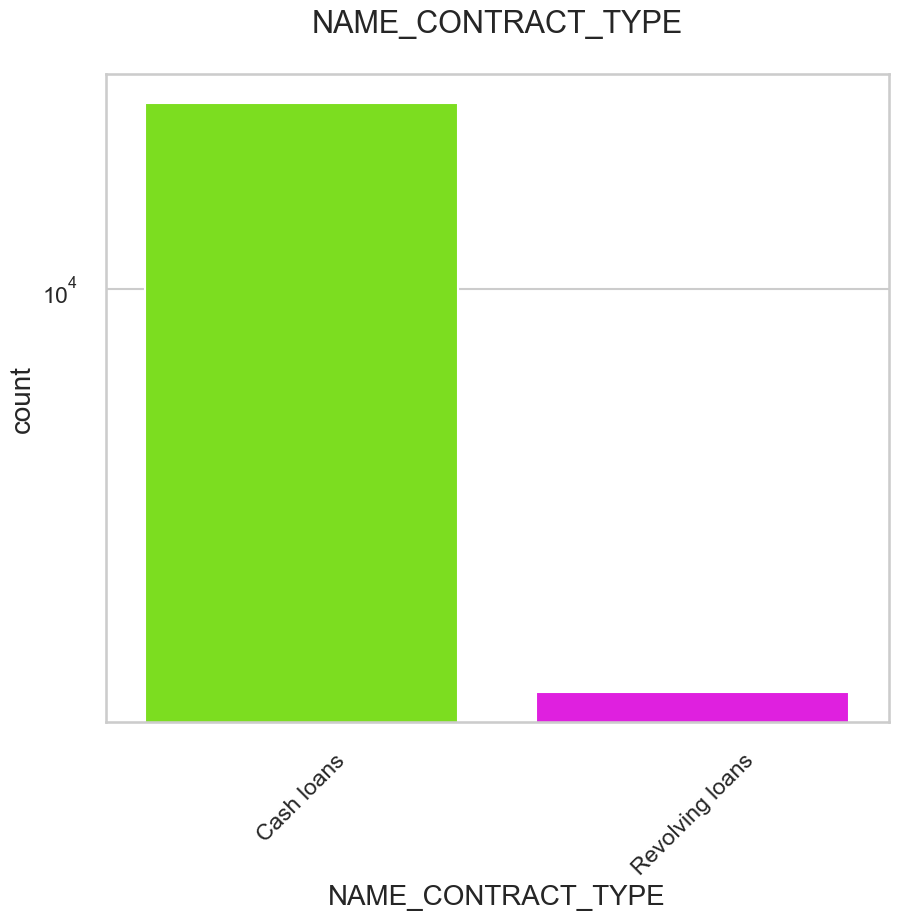

In [153]:
# PLotting for income range
uniplot(target1_Application_Data,col='NAME_CONTRACT_TYPE',title='NAME_CONTRACT_TYPE')

Revolving loans returned by males are very less in numbers.  
Case loans in repayment status and defaulting status in quite same.

In [138]:
Application_Data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'AMT_CREDIT_RANGE',
       'AMT_INCOME_RANGE'],
      dtype='object')

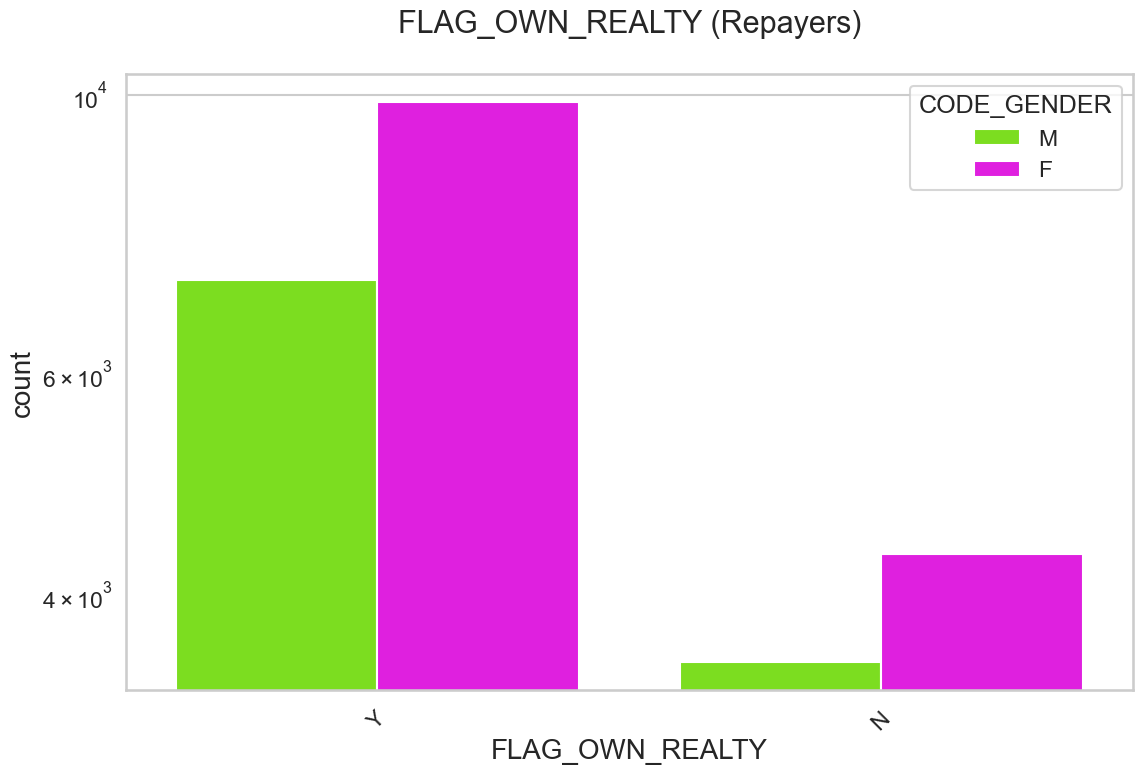

In [31]:

uniplot(target1_Application_Data,col='FLAG_OWN_REALTY',title='FLAG_OWN_REALTY (Repayers)',hue='CODE_GENDER')

Females who don't have a car have big chance of repaying the loan and vice versa.  
Males owning no any flat or house have less chance of returning the loan.


<Figure size 1500x3000 with 0 Axes>

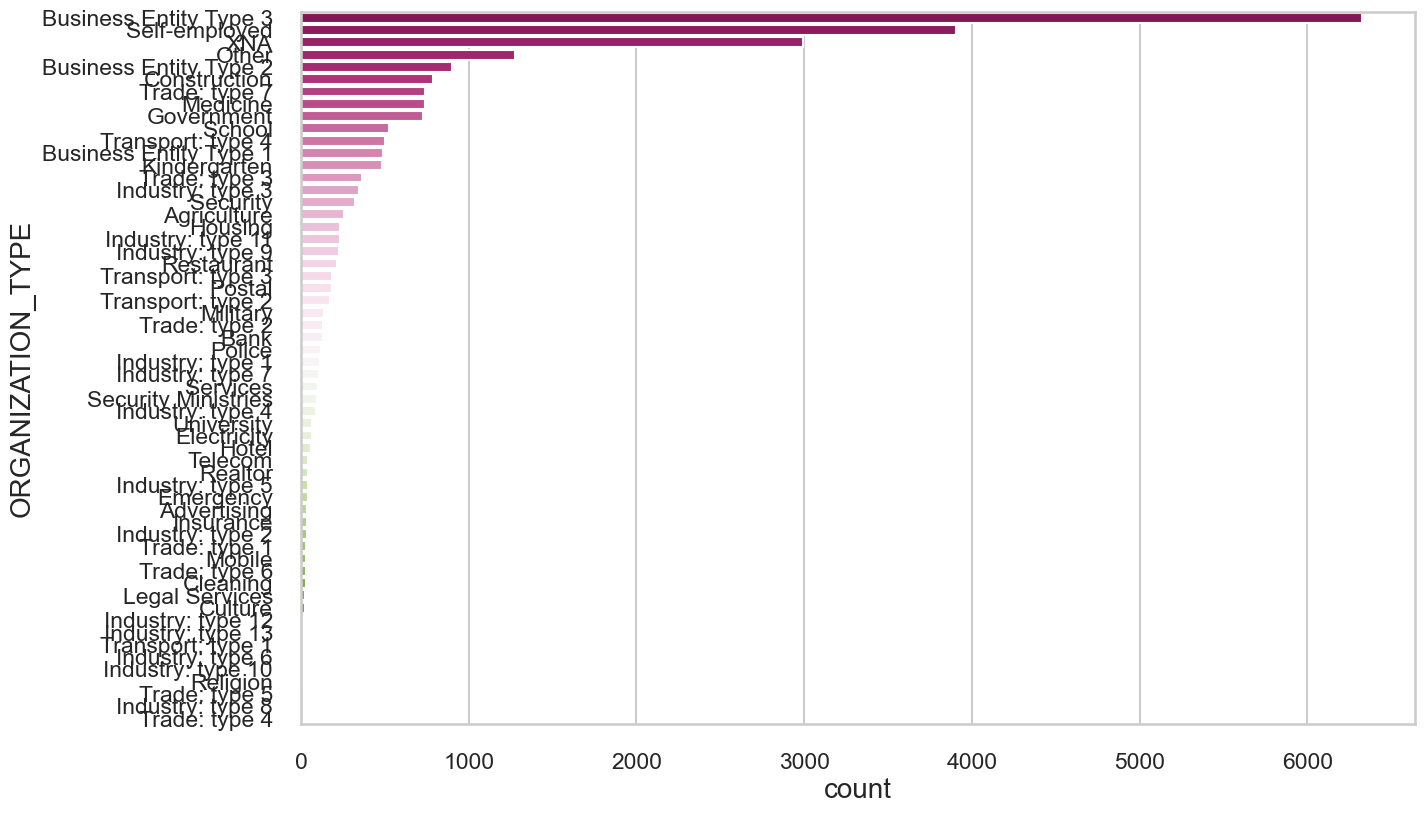

<Figure size 1500x3000 with 0 Axes>

In [135]:
#Organization type counts in case of TARGET-1 (payed loan)
sns.countplot(data=target1_Application_Data,y='ORGANIZATION_TYPE',order=target1_Application_Data['ORGANIZATION_TYPE'].value_counts().index,palette='PiYG')
plt.figure(figsize=(15,30))

In [157]:
target1_Application_Data['FLAG_OWN_CAR'].value_counts(normalize=True)*100

N    69.482377
Y    30.517623
Name: FLAG_OWN_CAR, dtype: float64

In [158]:
target1_Application_Data['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

Y    68.410876
N    31.589124
Name: FLAG_OWN_REALTY, dtype: float64

In [203]:
Application_Data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'AMT_CREDIT_RANGE',
       'AMT_INCOME_RANGE'],
      dtype='object')

**Insights:**  
1.loan applicants not having a car are in better numbers in repayment status (69%).  
2.Loan applicants owning a house or flat are also in good number (68%).

##  5.Bivariate analysis

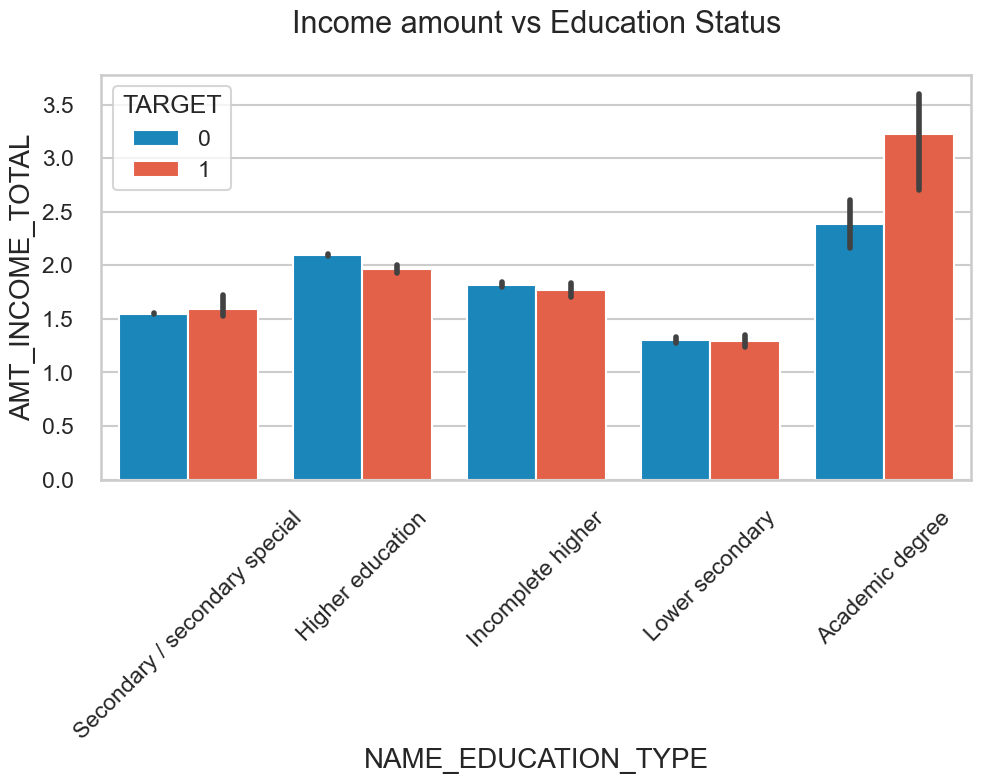

In [218]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(data =Application_Data, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='TARGET',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

1. Clients having academic degree have the most income have more counts in defaulters than repayers.  
2. Clients educated from lower secondary are equal number of counts in defaulters adn repayers.


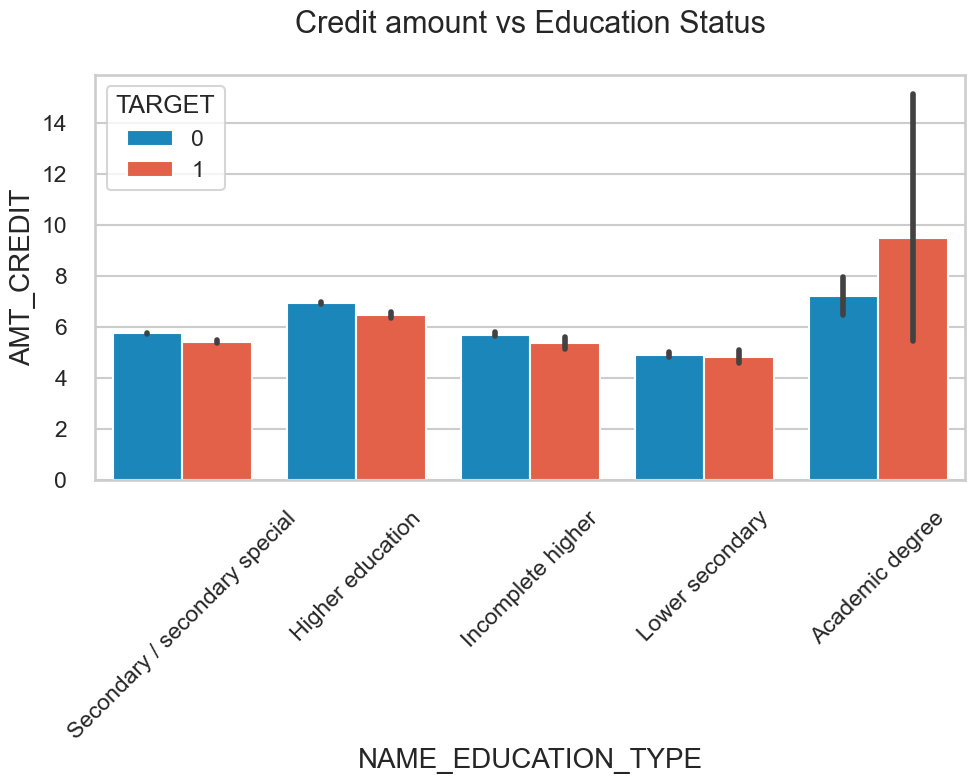

In [217]:
# Box plotting for Credit amount

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(data =Application_Data, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='TARGET',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

Academic degree people are safe side of giving loans as they have credited huge amount and they have returned less than credited amount to the company. 

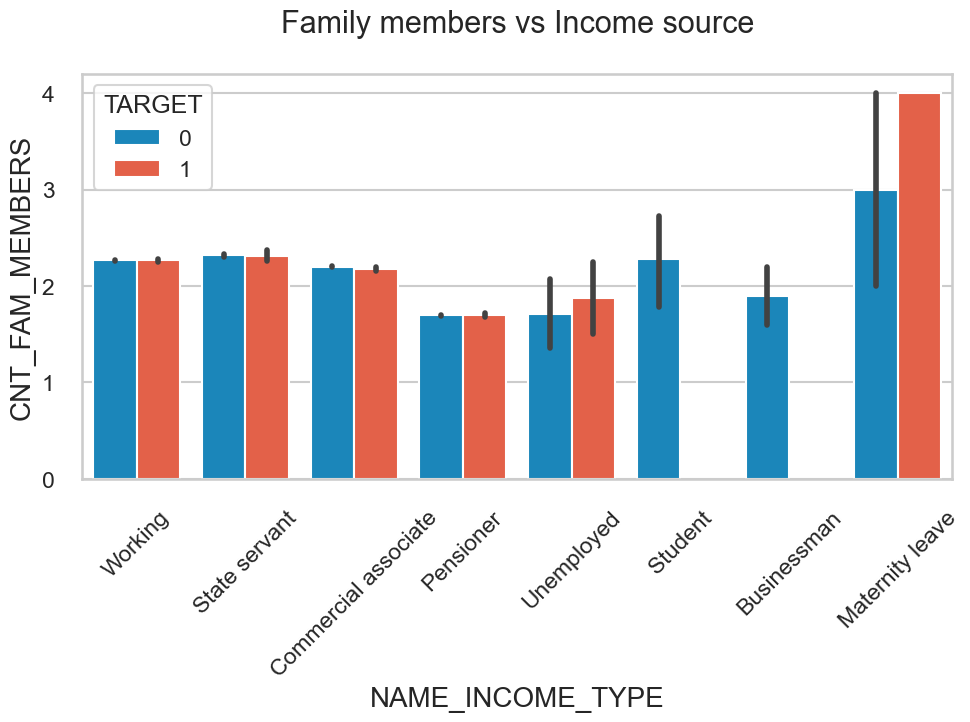

In [230]:
# Box plotting for Income source in logarithmic scale

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(data =Application_Data, x='NAME_INCOME_TYPE',y='CNT_FAM_MEMBERS', hue ='TARGET',orient='v')
plt.title('Family members vs Income source')
plt.show()

1. Working people having 2 family members are equal number of repayers and defaulters,
2. People who geting income through Maternity Leave tends to be more Defaulter when they have more Family Members

C:\Users\sami\AppData\Roaming\Python\Python310\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\sami\AppData\Roaming\Python\Python310\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


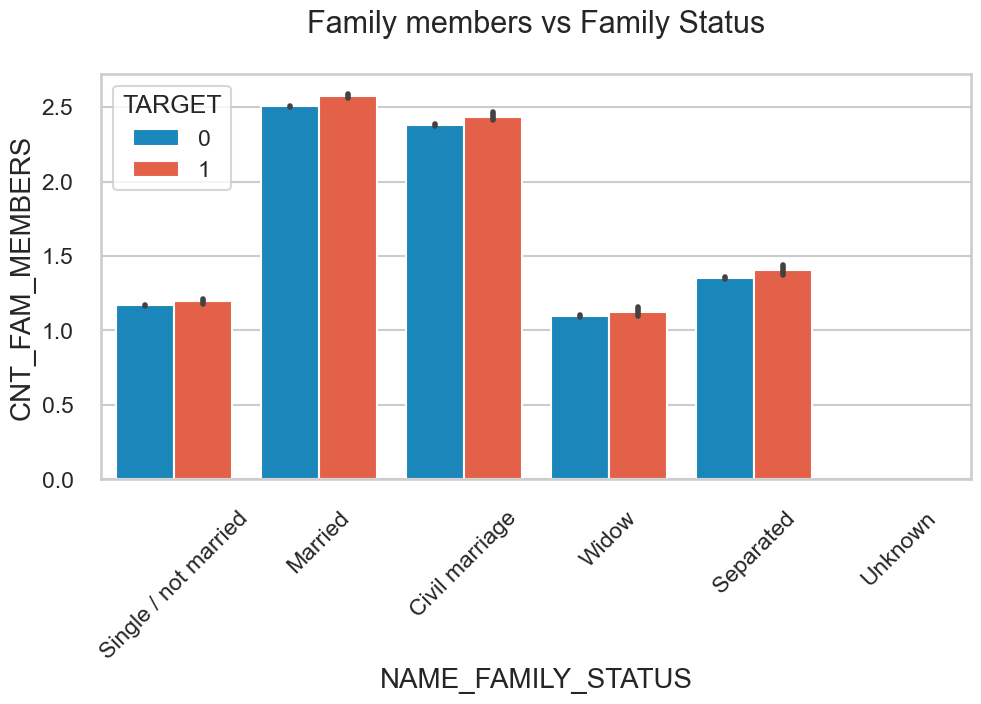

In [228]:
# Box plotting for Income source in logarithmic scale

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(data =Application_Data, x='NAME_FAMILY_STATUS',y='CNT_FAM_MEMBERS', hue ='TARGET',orient='v')
plt.title('Family members vs Family Status')
plt.show()

Married people are high in defaulter counts as they have more childrens this may be a reason of defaulting.

## 6.A. Correlation in Target 1 (payment difficulties)

In [61]:
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [67]:
#Converting object values into numerical ones
object_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for col in object_columns:
    Application_Data[col] =pd.Categorical(Application_Data[col])

In [68]:
Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

In [ ]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
corr_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = Application_Data.loc[Application_Data['TARGET']==0, corr_cols] # Repayers
Defaulter_df = Application_Data.loc[Application_Data['TARGET']==1, corr_cols] # Defaulters

C:\Users\sami\AppData\Local\Temp\ipykernel_11904\2482892752.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_t0=target1_Application_Data.corr()


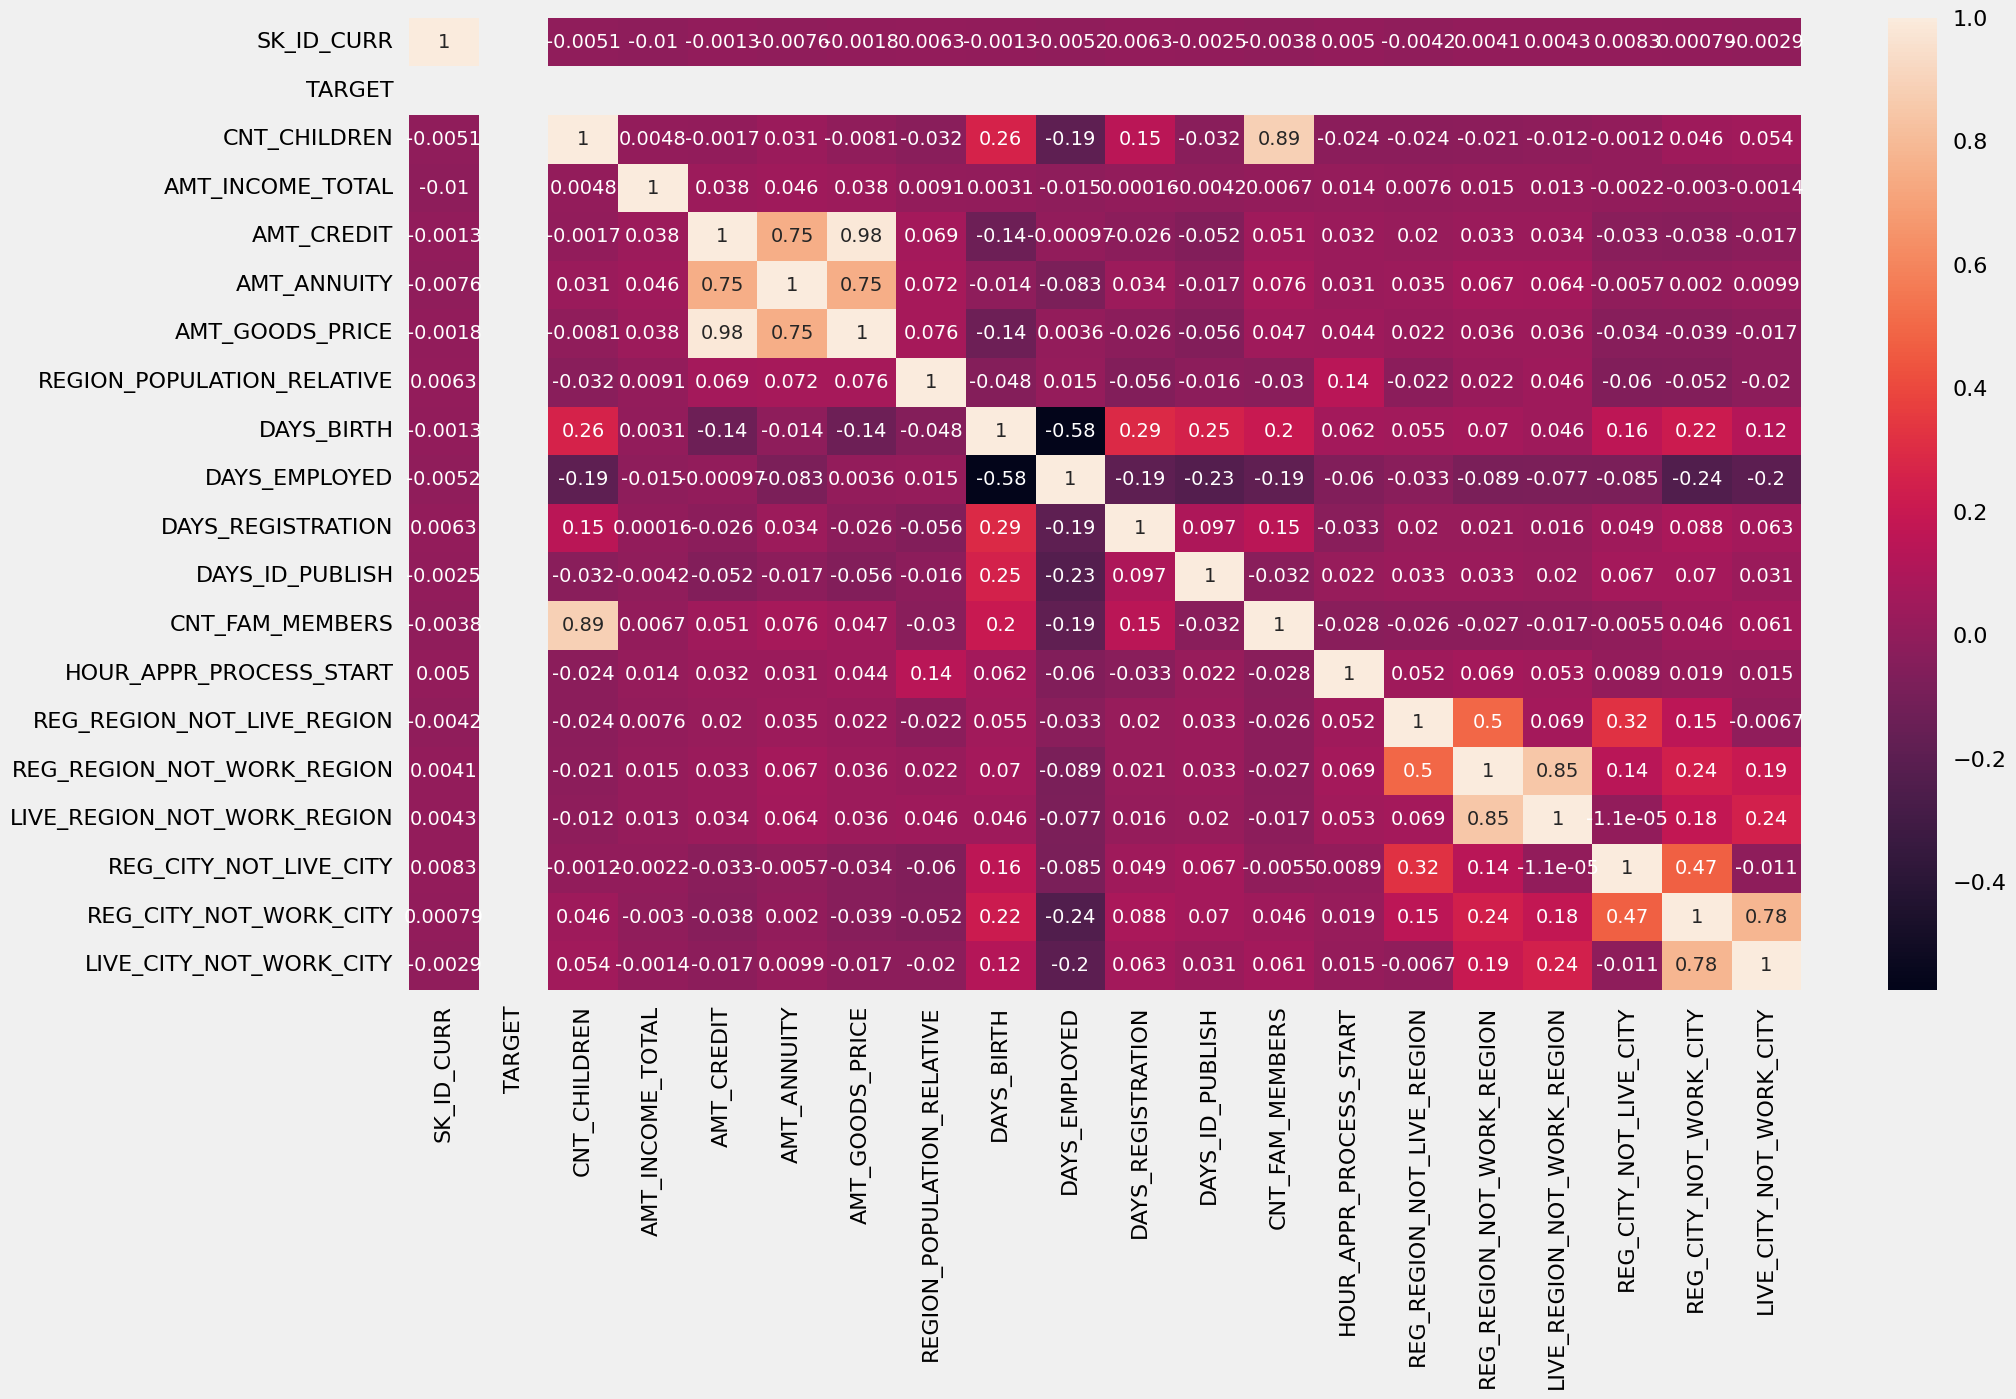

In [74]:
Correlation_t1=target1_Application_Data.corr()
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(Correlation_t1,annot=True)
plt.show()

In [75]:
# Getting the top 10 correlation for the target 1 (Repayers)
corr_repayer = target1_Application_Data.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

C:\Users\sami\AppData\Local\Temp\ipykernel_11904\1930101792.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_repayer = target1_Application_Data.corr()


VAR1                        VAR2  Correlation
124              AMT_GOODS_PRICE                  AMT_CREDIT     0.982783
242              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484
335  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
398      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540
125              AMT_GOODS_PRICE                 AMT_ANNUITY     0.752295
104                  AMT_ANNUITY                  AMT_CREDIT     0.752195
188                DAYS_EMPLOYED                  DAYS_BIRTH     0.575097
314   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.497937
377       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY     0.472052
354       REG_CITY_NOT_LIVE_CITY  REG_REGION_NOT_LIVE_REGION     0.322628

1. AMT_GOODS_PRICE and AMT_CREDIT is highly correlated.
2. Also AMT_GOODS_PRICE is correlated with AMT_ANNUITY at 0.75
3. CNT_FAM_MEMBERS and CNT_CHILDREN are also correlated at 0.88

## 6.A. Correlation in Target 0 (other cases)

C:\Users\sami\AppData\Local\Temp\ipykernel_11904\427991449.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_t0=target0_Application_Data.corr()


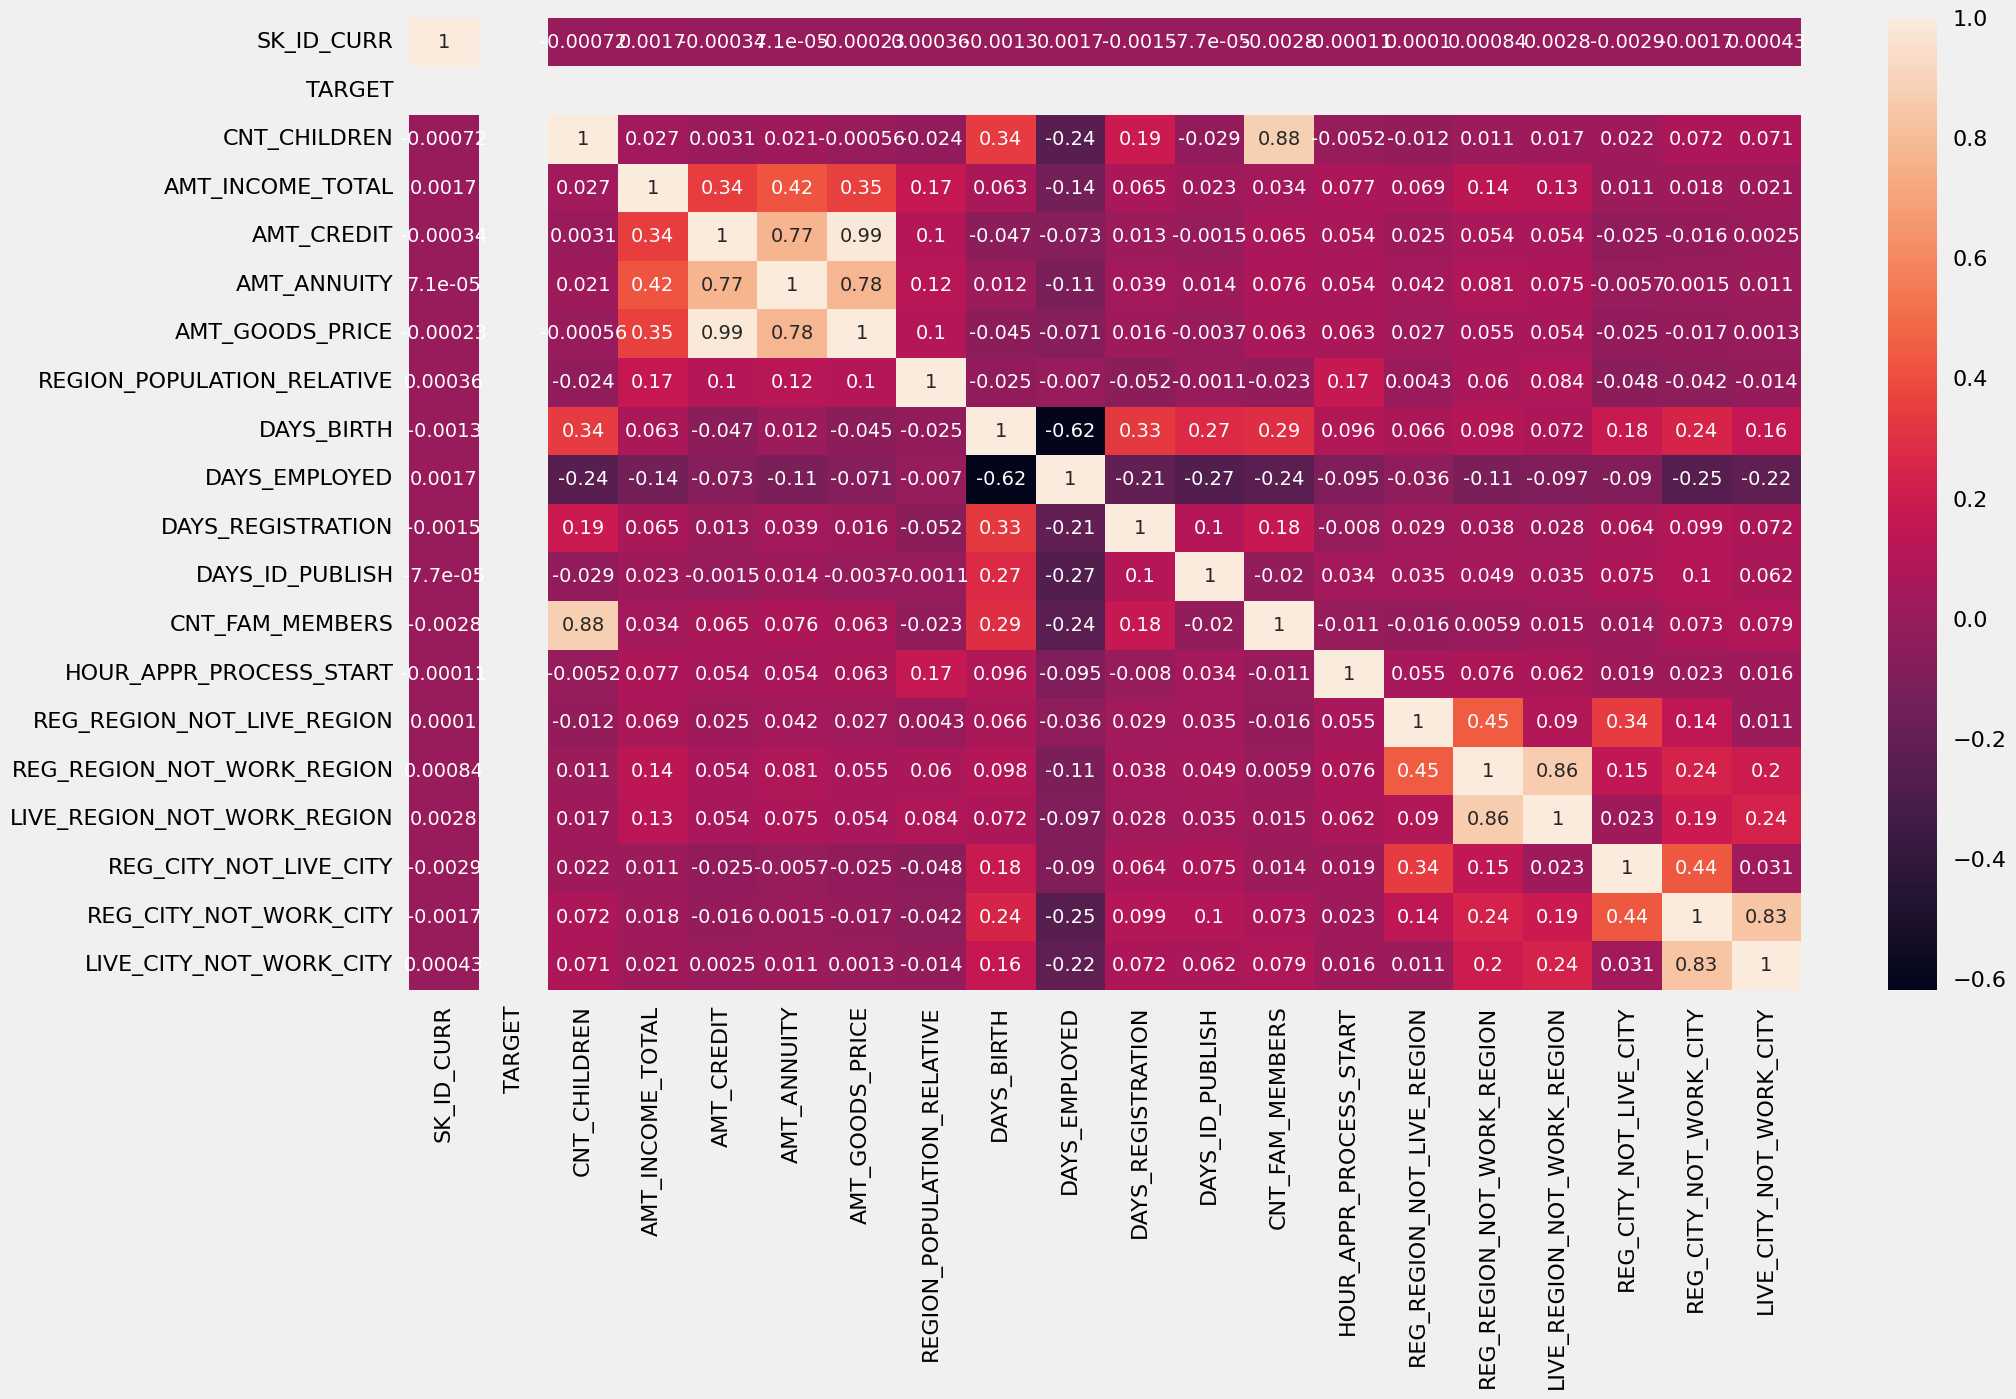

In [76]:
Correlation_t0=target0_Application_Data.corr()
f, ax = plt.subplots(figsize=(20,12))
sns.heatmap(Correlation_t0,annot=True)
plt.show()

In [77]:
# Getting the top 10 correlation for the target 0 (Defaulters)
corr_repayer = target0_Application_Data.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

C:\Users\sami\AppData\Local\Temp\ipykernel_11904\1420969383.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_repayer = target0_Application_Data.corr()


VAR1                        VAR2  Correlation
124              AMT_GOODS_PRICE                  AMT_CREDIT     0.987022
242              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571
335  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
398      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381
125              AMT_GOODS_PRICE                 AMT_ANNUITY     0.776421
104                  AMT_ANNUITY                  AMT_CREDIT     0.771297
188                DAYS_EMPLOYED                  DAYS_BIRTH     0.618048
314   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.446101
377       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY     0.435514
103                  AMT_ANNUITY            AMT_INCOME_TOTAL     0.418948

1. Almost top 6 correlation are same but with slightly different values
2. In defaulter case, AMT_ANNUITY and AMT_INCOME_TOTAL at 0.41 come in top_10 correlation

## Visualization and summarization of some important data

In [79]:
Application_Data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [84]:
Previous_Application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP'],
      dtype='object')

In [129]:
#Calculating percentage value of each day on which client applied for current loan
Days_curr= Application_Data['WEEKDAY_APPR_PROCESS_START']

pc=round((Days_curr.value_counts()/Application_Data["WEEKDAY_APPR_PROCESS_START"].count())*100,2)
pc = pd.DataFrame(pc)
pc.reset_index(level=0, inplace=True)
pc.rename(columns=  {"index": "WEEKDAY_APPR_PROCESS_START", 
                     "WEEKDAY_APPR_PROCESS_START":"Percentage_of_Values"}, 
                                 inplace = True) 
pc.sort_values(by ='Percentage_of_Values', inplace = True, ascending = False)
pc

WEEKDAY_APPR_PROCESS_START  Percentage_of_Values
0                    TUESDAY                 17.53
1                  WEDNESDAY                 16.89
2                     MONDAY                 16.49
3                   THURSDAY                 16.45
4                     FRIDAY                 16.37
5                   SATURDAY                 11.01
6                     SUNDAY                  5.26

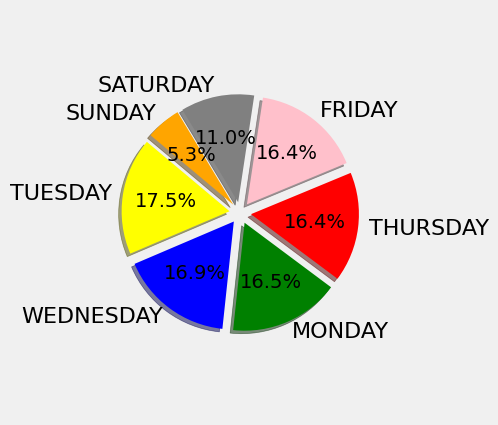

In [130]:
# Displaying on which day most of the client applied for current loan

labels = pc.WEEKDAY_APPR_PROCESS_START
sizes = pc.Percentage_of_Values
colors = ['yellow', 'blue', 'green', 'red','pink','grey','orange']
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1)
plt.figure(figsize=(3,5))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

**Out of 100 only 16% of clients have applied on weekend days(Saturday & Sunday) for current loan meanwhile on TUESDAY most of the clients about 17% have shown interest for applying**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Co-op apartment'),
  Text(1, 0, 'House / apartment'),
  Text(2, 0, 'Municipal apartment'),
  Text(3, 0, 'Office apartment'),
  Text(4, 0, 'Rented apartment'),
  Text(5, 0, 'With parents')])

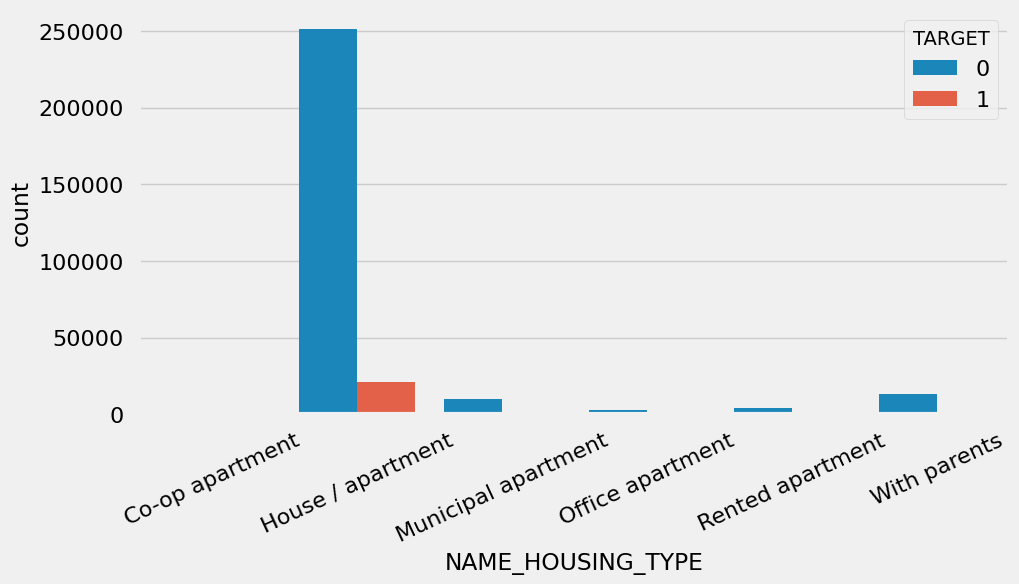

In [136]:
plt.figure(figsize=(10,5))
sns.countplot(x=Application_Data['NAME_HOUSING_TYPE'],data= Application_Data,hue=Application_Data['TARGET'])
plt.xticks(rotation = 25)

**Clients living in apartments and house have the most defaulters**

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=Previous_Application['AMT_CREDIT'],data= Previous_Application,hue=Previous_Application['NAME_CONTRACT_TYPE'])
plt.xticks(rotation = 25)

In [143]:
round(Application_Data['NAME_HOUSING_TYPE'].value_counts()/Application_Data['NAME_HOUSING_TYPE'].count()*100,2)

House / apartment      88.73
With parents            4.83
Municipal apartment     3.64
Rented apartment        1.59
Office apartment        0.85
Co-op apartment         0.36
Name: NAME_HOUSING_TYPE, dtype: float64

### Some summaries

In [146]:
round(Previous_Application['NAME_CLIENT_TYPE'].value_counts()/Previous_Application['NAME_CLIENT_TYPE'].count()*100,2)

Repeater     73.72
New          18.04
Refreshed     8.12
XNA           0.12
Name: NAME_CLIENT_TYPE, dtype: float64

**18% of clients have applied for very first time where almost 73% of clients have applied for loan again**

In [150]:
round(Previous_Application['CODE_REJECT_REASON'].value_counts()/Previous_Application['CODE_REJECT_REASON'].count()*100,2)

XAP       81.01
HC        10.49
LIMIT      3.33
SCO        2.24
CLIENT     1.58
SCOFR      0.77
XNA        0.31
VERIF      0.21
SYSTEM     0.04
Name: CODE_REJECT_REASON, dtype: float64

**After XAP, the common reason behind rejection of loan is *HC***

In [37]:
round(Previous_Application['NAME_PORTFOLIO'].value_counts()/Previous_Application['NAME_PORTFOLIO'].count()*100,2)

XNA        63.68
x-sell     27.32
walk-in     9.00
Name: NAME_PRODUCT_TYPE, dtype: float64

**In Previuos application,about 41% of clients have applied for POS followed by Cash with 22%**

## Insights from Merged Dataset  (Application_Data and Previous_Application)


In [21]:
merge_app=pd.merge(left=Application_Data,right=Previous_Application,how='inner',on='SK_ID_CURR',suffixes='_x')

C:\Users\sami\AppData\Local\Temp\ipykernel_31264\3549917417.py:1: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  merge_app=pd.merge(left=Application_Data,right=Previous_Application,how='inner',on='SK_ID_CURR',suffixes='_x')


In [22]:
merge_app.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 54 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_          1413701 non-null  object 
 3   CODE_GENDER                  1413701 non-null  object 
 4   FLAG_OWN_CAR                 1413701 non-null  object 
 5   FLAG_OWN_REALTY              1413701 non-null  object 
 6   CNT_CHILDREN                 1413701 non-null  int64  
 7   AMT_INCOME_TOTAL             1413701 non-null  float64
 8   AMT_CREDIT_                  1413701 non-null  float64
 9   AMT_ANNUITY_                 1413701 non-null  float64
 10  NAME_INCOME_TYPE             1413701 non-null  object 
 11  NAME_EDUCATION_TYPE          1413701 non-null  object 
 12  NAME_FAMILY_STATUS           1413701 non-n

In [23]:
# Renaming the column names after merging

new_merge = merge_app.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY','AMT_GOODS_PRICE_':'AMT_GOODS_PRICE'
                         ,'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV','AMT_GOODS_PRICEx':'AMT_GOODS_PRICE'
                         ,'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [24]:
new_merge.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION',
       'AMT_CREDIT_PREV', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START_PREV', 'HOUR_APPR_PROCESS_START_PREV',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PU

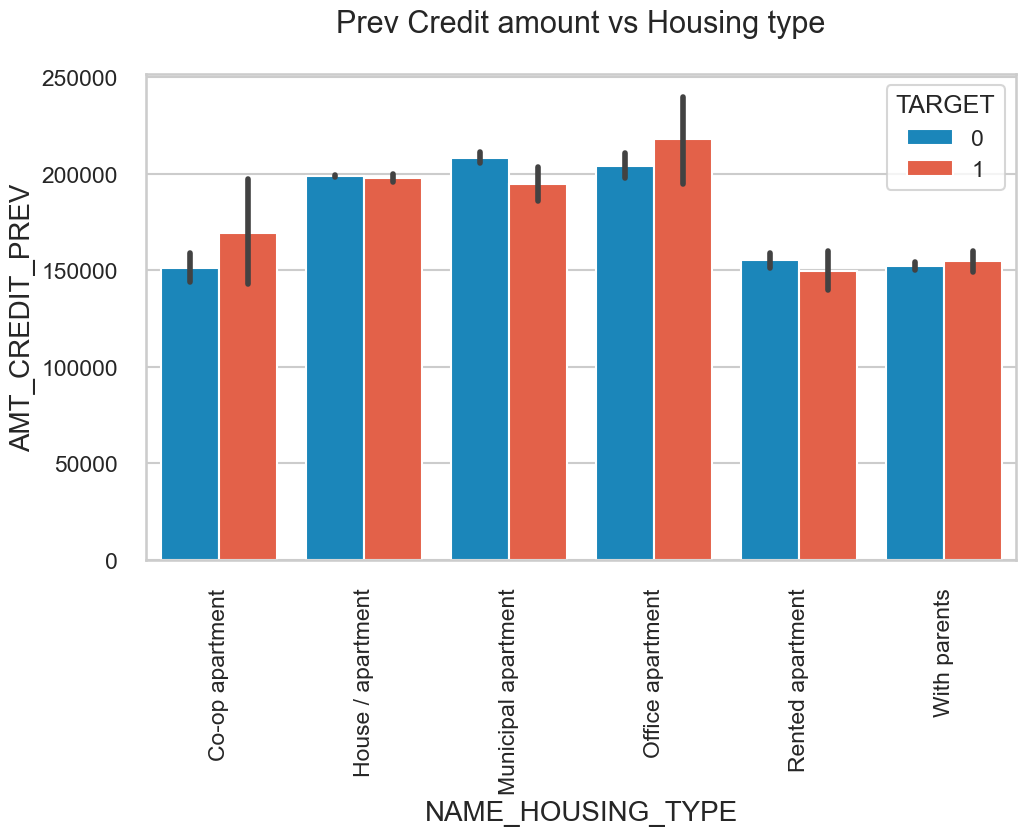

In [193]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(data =new_merge, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

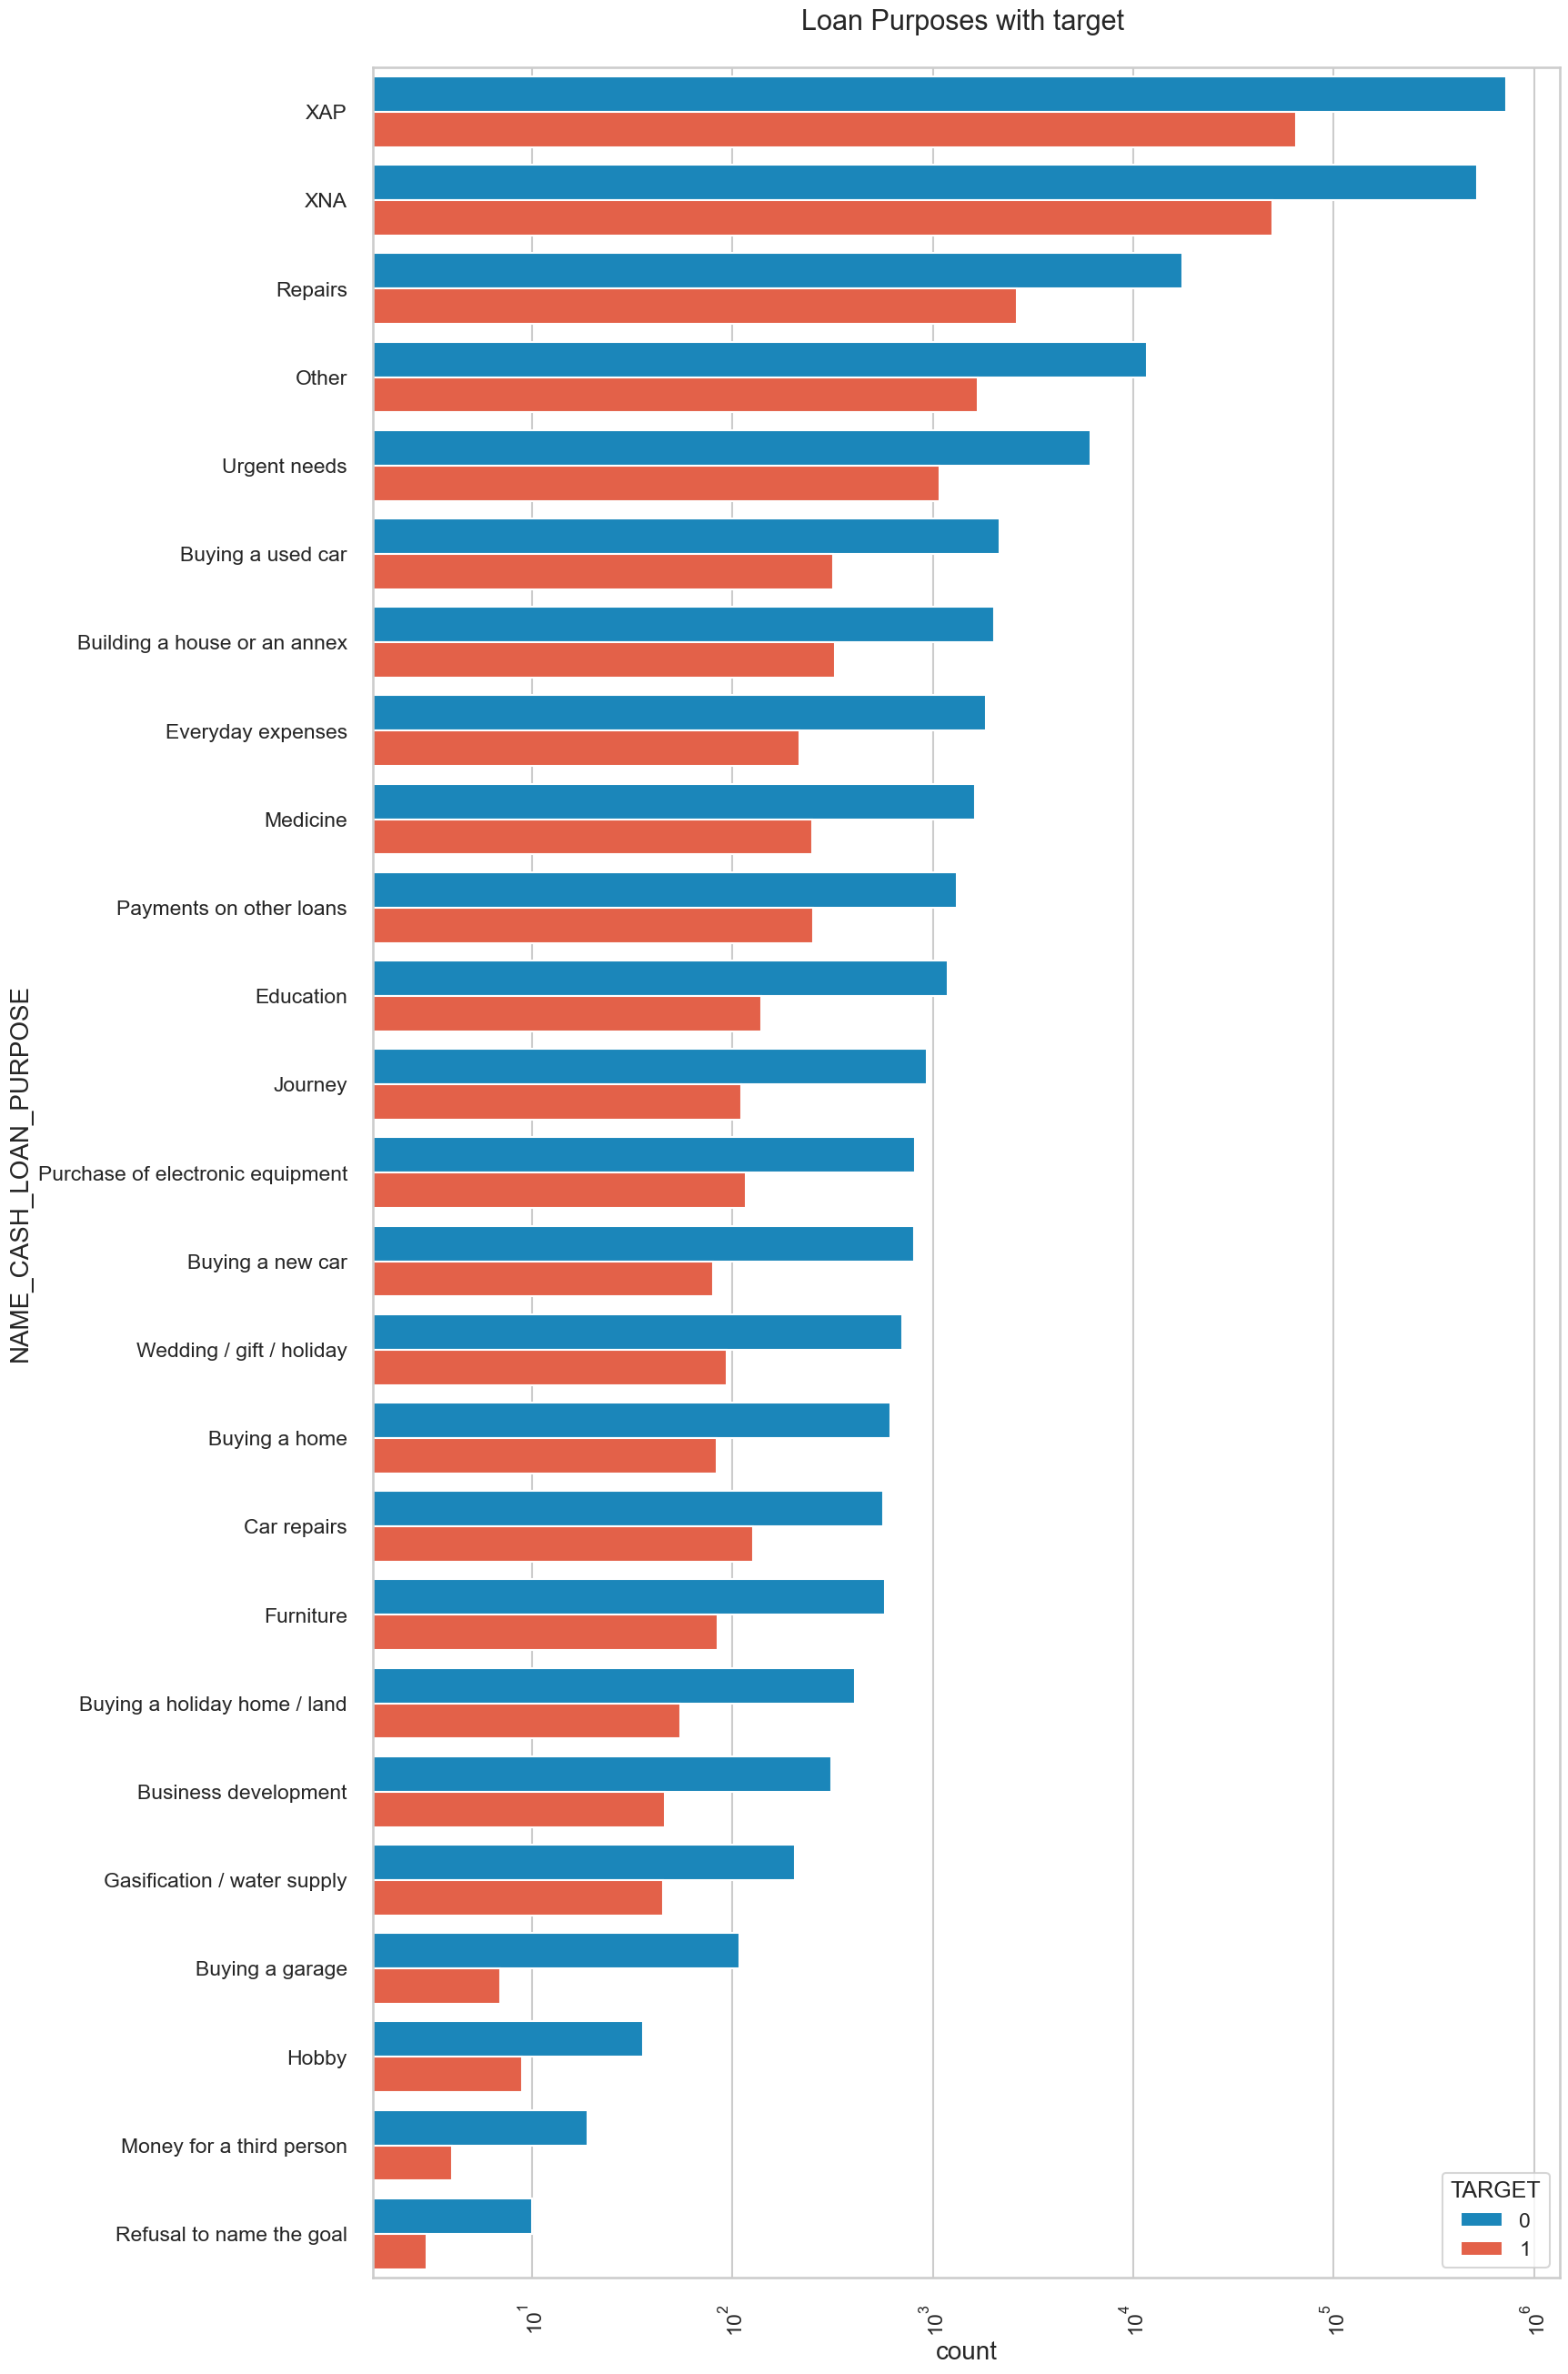

In [177]:
# Distribution of loan purpose
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Loan Purposes with target ')
ax = sns.countplot(data = new_merge, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 

**Other than XAP and XNA, for repairing purpose most of the defaulters have taken advantage of loan amount  
  Buying a used car is also a major reason of applying loan after urgent needs.**

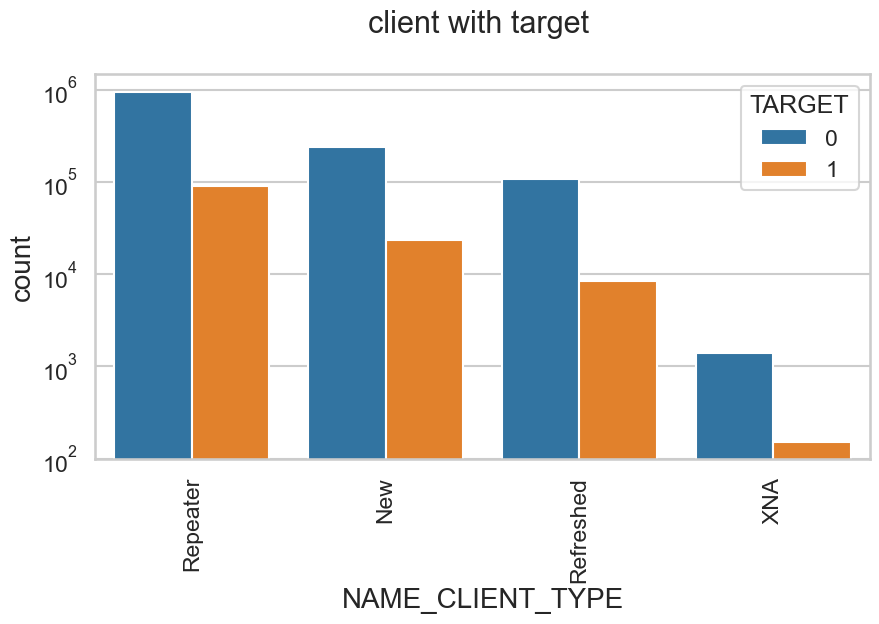

In [33]:
# Distribution of client vs target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,5))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('client with target ')
ax = sns.countplot(data = new_merge, x= 'NAME_CLIENT_TYPE', 
                   order=new_merge['NAME_CLIENT_TYPE'].value_counts().index,hue = 'TARGET') 

New clients have returned their loan payment but there are still defaulters more than repayers.  
Whereas clients applying for loan again has most count in terms of loan not paying status.

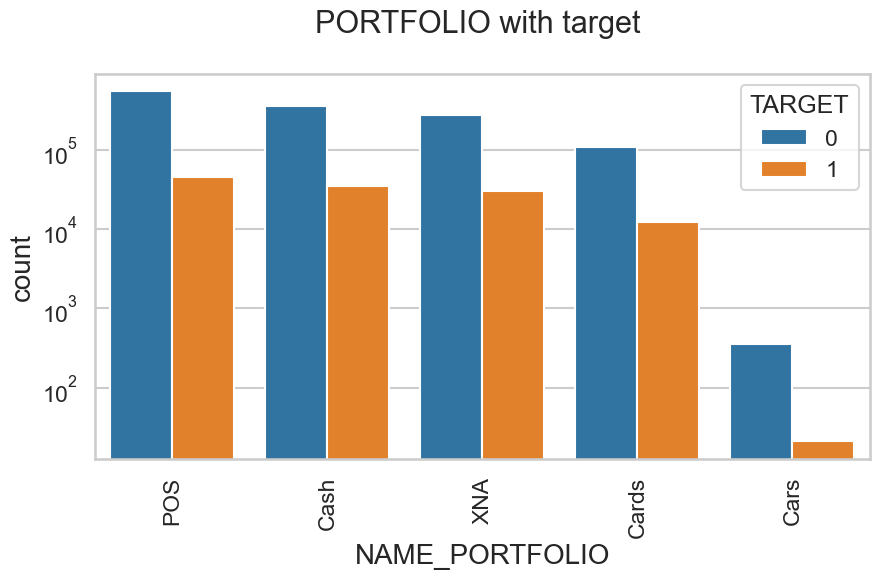

In [34]:
# Distribution of portfolio vs target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,5))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('PORTFOLIO with target ')
ax = sns.countplot(data = new_merge, x= 'NAME_PORTFOLIO', 
                   order=new_merge['NAME_PORTFOLIO'].value_counts().index,hue = 'TARGET') 

Company should pay attention on client whose previuos application was for POS, Cash,etc beacuse they are also contributing to the defaulters counts.  

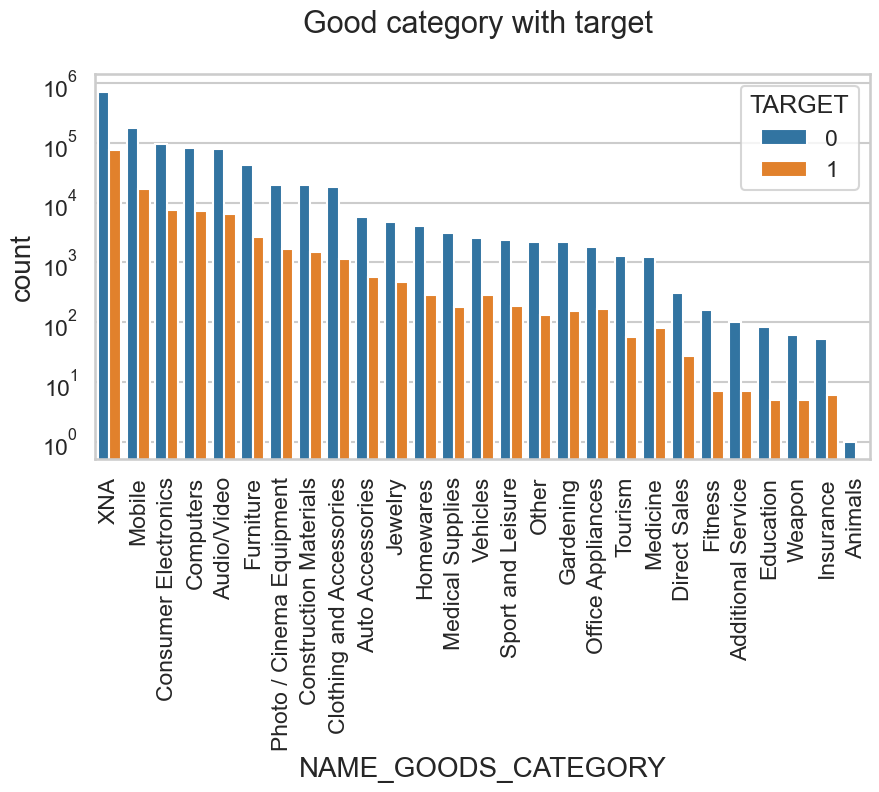

In [39]:
# Distribution of product category vs target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,5))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Good category with target ')
ax = sns.countplot(data = new_merge, x= 'NAME_GOODS_CATEGORY', 
                   order=new_merge['NAME_GOODS_CATEGORY'].value_counts().index,hue = 'TARGET') 

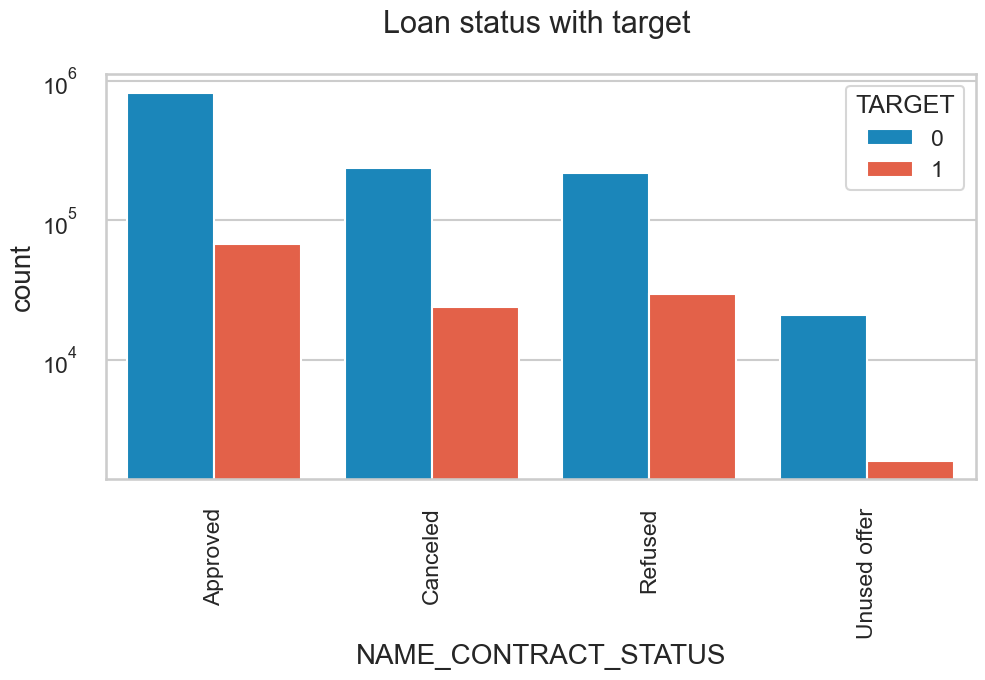

In [185]:
# Distribution of LOAN status vs target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,5))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Loan status with target ')
ax = sns.countplot(data = new_merge, x= 'NAME_CONTRACT_STATUS', 
                   order=new_merge['NAME_CONTRACT_STATUS'].value_counts().index,hue = 'TARGET') 

**People living in office appartment is having higher credit for defaulting and people of co-op apartment have repaid the loan despite taking huge amount of loan.  
Municipal apartment also have huge bars in not repaying loan.**

**Defaulters using unused offer for their benefit whereas only more than half number of approved loans are repaid**

### THANK YOU